# Problem 2

### Problem 2: Logistic Regression, LDA and CART

- You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

- The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.


#####  - Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

#### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython import display
import warnings
warnings.filterwarnings('ignore', message='not allowed')
import warnings
from sklearn.exceptions import ConvergenceWarning

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [3]:
plt.rcParams['font.size']=16
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 100)

In [4]:
data = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [5]:
data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


### Basic information about the dataset.
- There are 1473 records with 10 columns present in the dataset.
- There is a mixture of numeric and categorical data types.
    - 3 numeric features
    - 7 categorical features.
- There are few rows with the null entries.
- 

In [7]:
data['Husband_Occupation'] = pd.Categorical(data.Husband_Occupation)

In [8]:
data.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [9]:
data['No_of_children_born'] = data['No_of_children_born'].fillna(data['No_of_children_born'].mode()[0])
data['Wife_age'] = data['Wife_age'].fillna(data['Wife_age'].mode()[0])

In [10]:
data.isna().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [11]:
data.duplicated().sum()

87

In [12]:
data.loc[data.duplicated()]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
394,29.0,Tertiary,Tertiary,0.0,Scientology,Yes,2,Very High,Exposed,No
414,20.0,Primary,Secondary,3.0,Scientology,No,3,Very High,Exposed,No
462,36.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes
492,37.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes
528,29.0,Tertiary,Tertiary,2.0,Scientology,Yes,1,High,Exposed,Yes


- 2 columns contain missing records.
- There are 80 records which are duplicated.

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Wife_age                   1386 non-null   float64 
 1   Wife_ education            1386 non-null   object  
 2   Husband_education          1386 non-null   object  
 3   No_of_children_born        1386 non-null   float64 
 4   Wife_religion              1386 non-null   object  
 5   Wife_Working               1386 non-null   object  
 6   Husband_Occupation         1386 non-null   category
 7   Standard_of_living_index   1386 non-null   object  
 8   Media_exposure             1386 non-null   object  
 9   Contraceptive_method_used  1386 non-null   object  
dtypes: category(1), float64(2), object(7)
memory usage: 109.8+ KB


- After dropping duplicated rows, the count of null values reduced slightly.

In [15]:
data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


#### - Now we have data without null values and duplicate rows.

### 5 point summary or Statistical Infomation about the dataset

In [16]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1386.0,NaN,NaN,NaN,32.227273,8.254237,16.0,25.0,31.0,38.0,49.0
Wife_ education,1386,4,Tertiary,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1386,4,Tertiary,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1386.0,NaN,NaN,NaN,3.277056,2.390657,0.0,1.25,3.0,5.0,16.0
Wife_religion,1386,2,Scientology,1179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1386,2,No,1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1386.0,4.0,3.0,566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard_of_living_index,1386,4,Very High,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1386,2,Exposed,1277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1386,2,Yes,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Findings:
    1. wife_education, Husband_education and Standard_of_living_index has 4 unique labels.
    2. Wife_religion, Wife_working and Media_exposure has 2 unique labels.
    3. There is no major difference between $Mean$ and $Median$.
    4. There seems to be outliers in No_of_children_born.
    

### Univariate Analysis

- The dataset is with respect to target/dependent fetaures seems to be balanced (There is no much difference).

<AxesSubplot:ylabel='Contraceptive_method_used'>

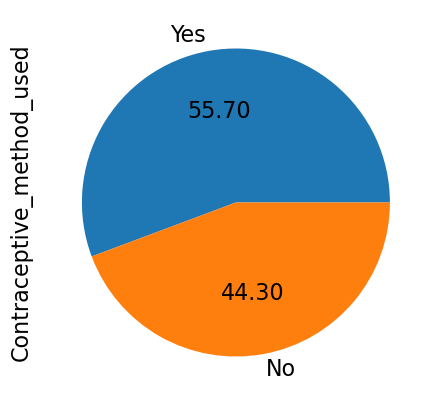

In [17]:
data['Contraceptive_method_used'].value_counts().plot(kind='pie',autopct='%.2f')
# It is a good balanced dataset 

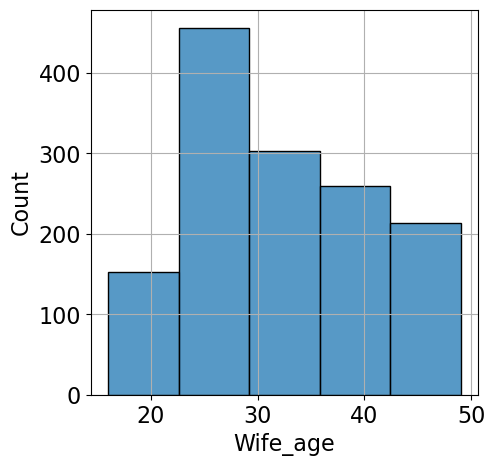

In [18]:
sns.histplot(data = data, x = data['Wife_age'], bins = 5, )
plt.show()

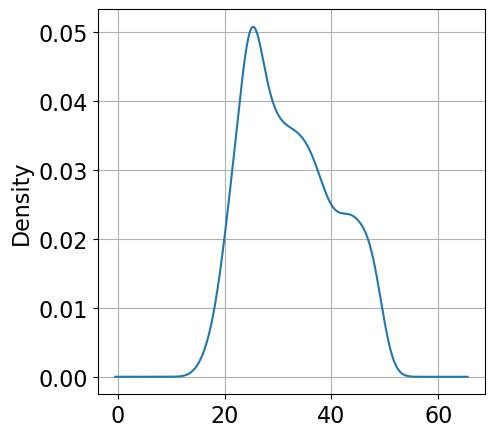

In [19]:
data['Wife_age'].plot(kind = "kde",)
plt.show()

In [20]:
data['Wife_age'].describe().T

count    1386.000000
mean       32.227273
std         8.254237
min        16.000000
25%        25.000000
50%        31.000000
75%        38.000000
max        49.000000
Name: Wife_age, dtype: float64

- 1. A dataset consists of Women's Age ranges from 16 to 49.
- 2. Average Women's Age is 32.5
- 3. Age is not normally distributed, it is bit rigth skewed with fatter tail.

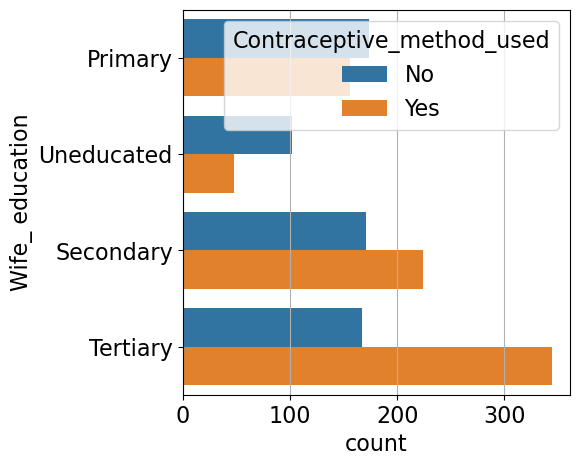

In [21]:
sns.countplot(data = data, y = data['Wife_ education'], hue ='Contraceptive_method_used')
plt.show()

- Eduaction level of wives with Uneducated and primary, are not using Contraceptive Method much.

In [22]:
data['Wife_ education'].value_counts(normalize=True)

Tertiary      0.368687
Secondary     0.284993
Primary       0.238095
Uneducated    0.108225
Name: Wife_ education, dtype: float64

- 90% of the females are having atleast a miminum education, Only 10% are illitrates.

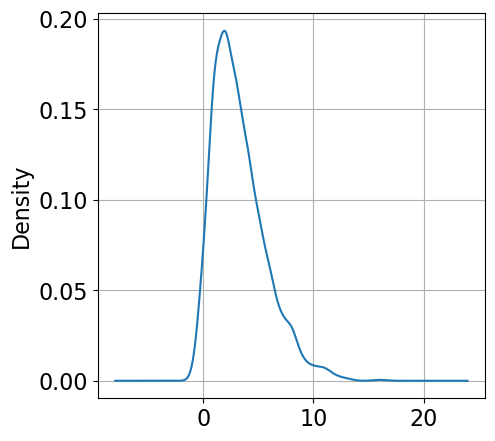

count    1386.000000
mean        3.277056
std         2.390657
min         0.000000
25%         1.250000
50%         3.000000
75%         5.000000
max        16.000000
Name: No_of_children_born, dtype: float64


In [23]:
data['No_of_children_born'].plot(kind = "kde", )
plt.show()

print(data['No_of_children_born'].describe())

- No_of_Childeren_Born is right skewed.
    - 1. Minimum is 0
    - 2. Maximum is 16
    - 3. Average is 3
    
- There seems to be Outliers in the No_of_children.

<AxesSubplot:xlabel='Wife_religion', ylabel='count'>

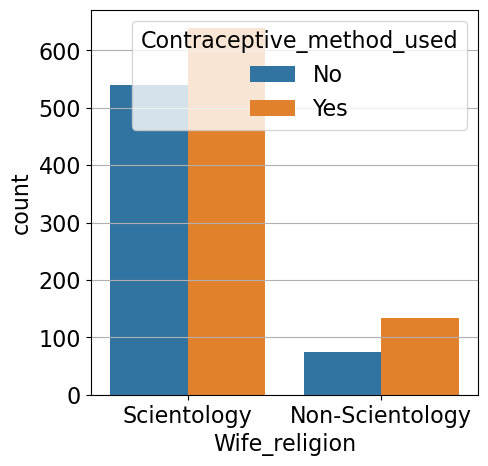

In [24]:
sns.countplot(x='Wife_religion', hue='Contraceptive_method_used', data=data)

- There is no impact of religion on use of the method

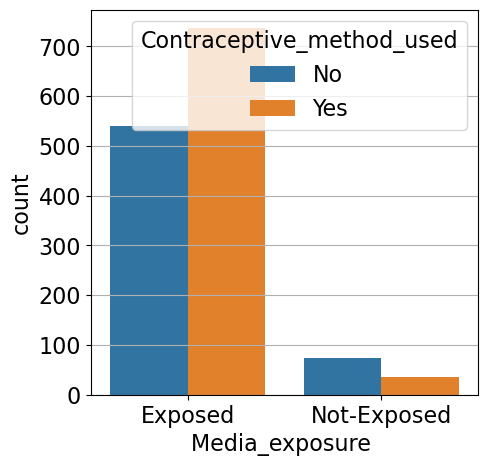

In [25]:
sns.countplot(data = data, x = data['Media_exposure '], hue = 'Contraceptive_method_used')
plt.show()

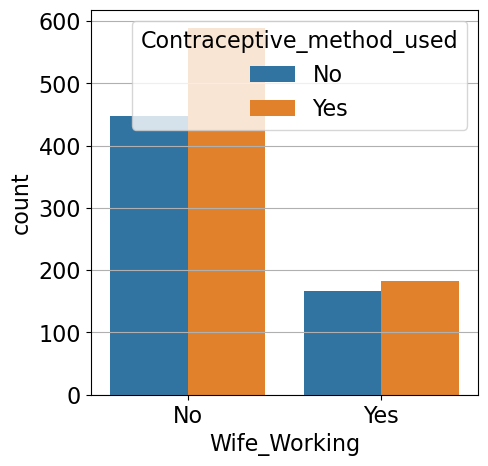

In [26]:
sns.countplot(data = data, x = data['Wife_Working'], hue = 'Contraceptive_method_used')
plt.show()

<AxesSubplot:xlabel='Wife_age'>

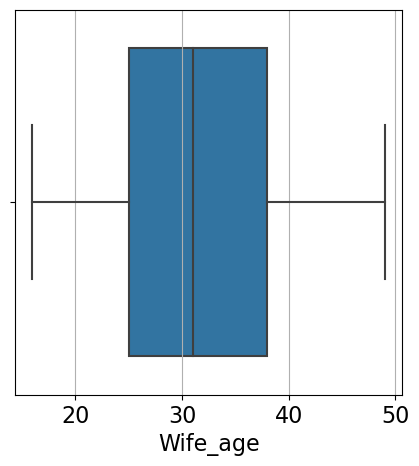

In [27]:
sns.boxplot(x=data.Wife_age)

<AxesSubplot:xlabel='No_of_children_born'>

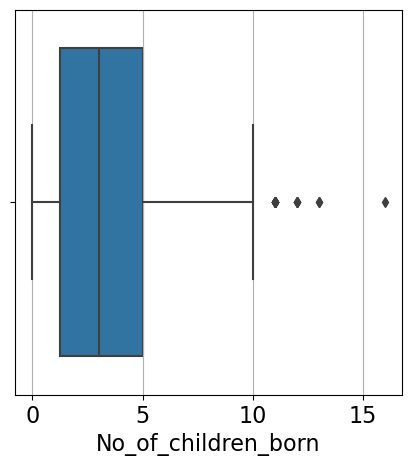

In [28]:
sns.boxplot(x=data.No_of_children_born)

### Bivariate Analysis

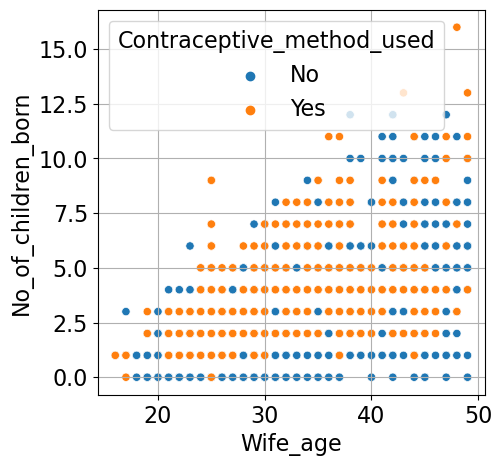

In [29]:
sns.scatterplot(data = data, x = data['Wife_age'], y = data['No_of_children_born'], hue= data['Contraceptive_method_used'])
plt.show()

- In the above scatterplot we can see there is a positive co-relation betweeen Wife_age" and "No_of_children_born", As the Age increases number od children is also increasing.

In [31]:
# Even though Contraceptive method used - Yes the number of children is high.

In [32]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

### - Note: The data in the target variable is almost same, the data is balanced. 

### Outlier Detection and Treatment

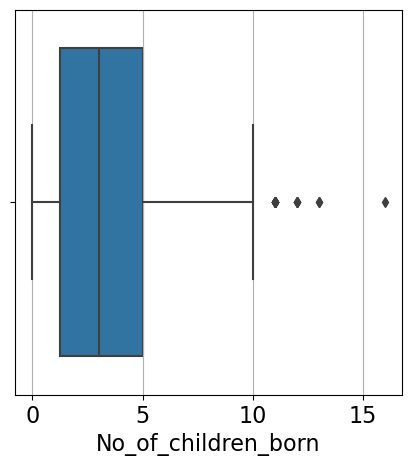

In [33]:
sns.boxplot(data = data, x = data['No_of_children_born'])
plt.show()

-  As there is only column(Wife_age) with the continous values, We can see the values are normally distributed. There is no Outliers.

In [34]:
data[data['No_of_children_born'] > 10]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
182,42.0,Uneducated,Secondary,12.0,Scientology,No,3,High,Exposed,No
192,44.0,Uneducated,Uneducated,11.0,Scientology,No,4,Very Low,Not-Exposed,No
200,42.0,Uneducated,Tertiary,11.0,Non-Scientology,No,2,Low,Not-Exposed,No
249,46.0,Secondary,Primary,11.0,Scientology,Yes,2,Low,Not-Exposed,No
485,47.0,Secondary,Tertiary,11.0,Scientology,Yes,2,High,Exposed,Yes
519,43.0,Primary,Tertiary,13.0,Scientology,No,2,High,Exposed,Yes
561,49.0,Secondary,Secondary,11.0,Scientology,No,1,Very High,Exposed,Yes
653,48.0,Tertiary,Tertiary,16.0,Scientology,No,1,Very High,Exposed,Yes
675,49.0,Tertiary,Secondary,13.0,Scientology,No,1,Very High,Exposed,Yes
747,44.0,Tertiary,Tertiary,11.0,Scientology,No,1,Very High,Exposed,Yes


In [35]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    upper_range= Q3+(1.5 * IQR)
    return upper_range

In [36]:
#Cap & floor the values beyond the outlier boundaries
UL = remove_outlier(data['No_of_children_born'])
data['No_of_children_born'] = np.where(data['No_of_children_born'] > UL, UL, data['No_of_children_born'])


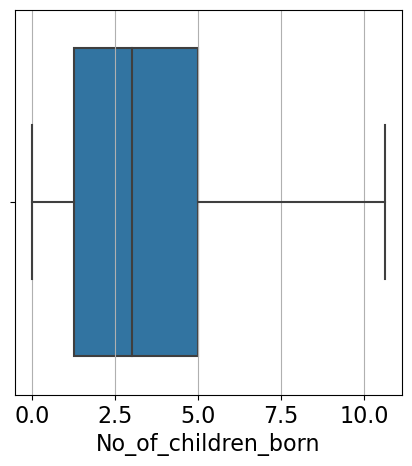

In [37]:
sns.boxplot(data = data, x = data['No_of_children_born'])
plt.show()

- Capping outliers with maximum value.

##### Encoding the dataset with get_dummies()

In [194]:
data_mod = pd.get_dummies(data, drop_first=True)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1472
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Wife_age                            1386 non-null   float64
 1   No_of_children_born                 1386 non-null   float64
 2   Wife_ education_Secondary           1386 non-null   uint8  
 3   Wife_ education_Tertiary            1386 non-null   uint8  
 4   Wife_ education_Uneducated          1386 non-null   uint8  
 5   Husband_education_Secondary         1386 non-null   uint8  
 6   Husband_education_Tertiary          1386 non-null   uint8  
 7   Husband_education_Uneducated        1386 non-null   uint8  
 8   Wife_religion_Scientology           1386 non-null   uint8  
 9   Wife_Working_Yes                    1386 non-null   uint8  
 10  Husband_Occupation_2                1386 non-null   uint8  
 11  Husband_Occupation_3                1386 no

#### Multivariate Analysis

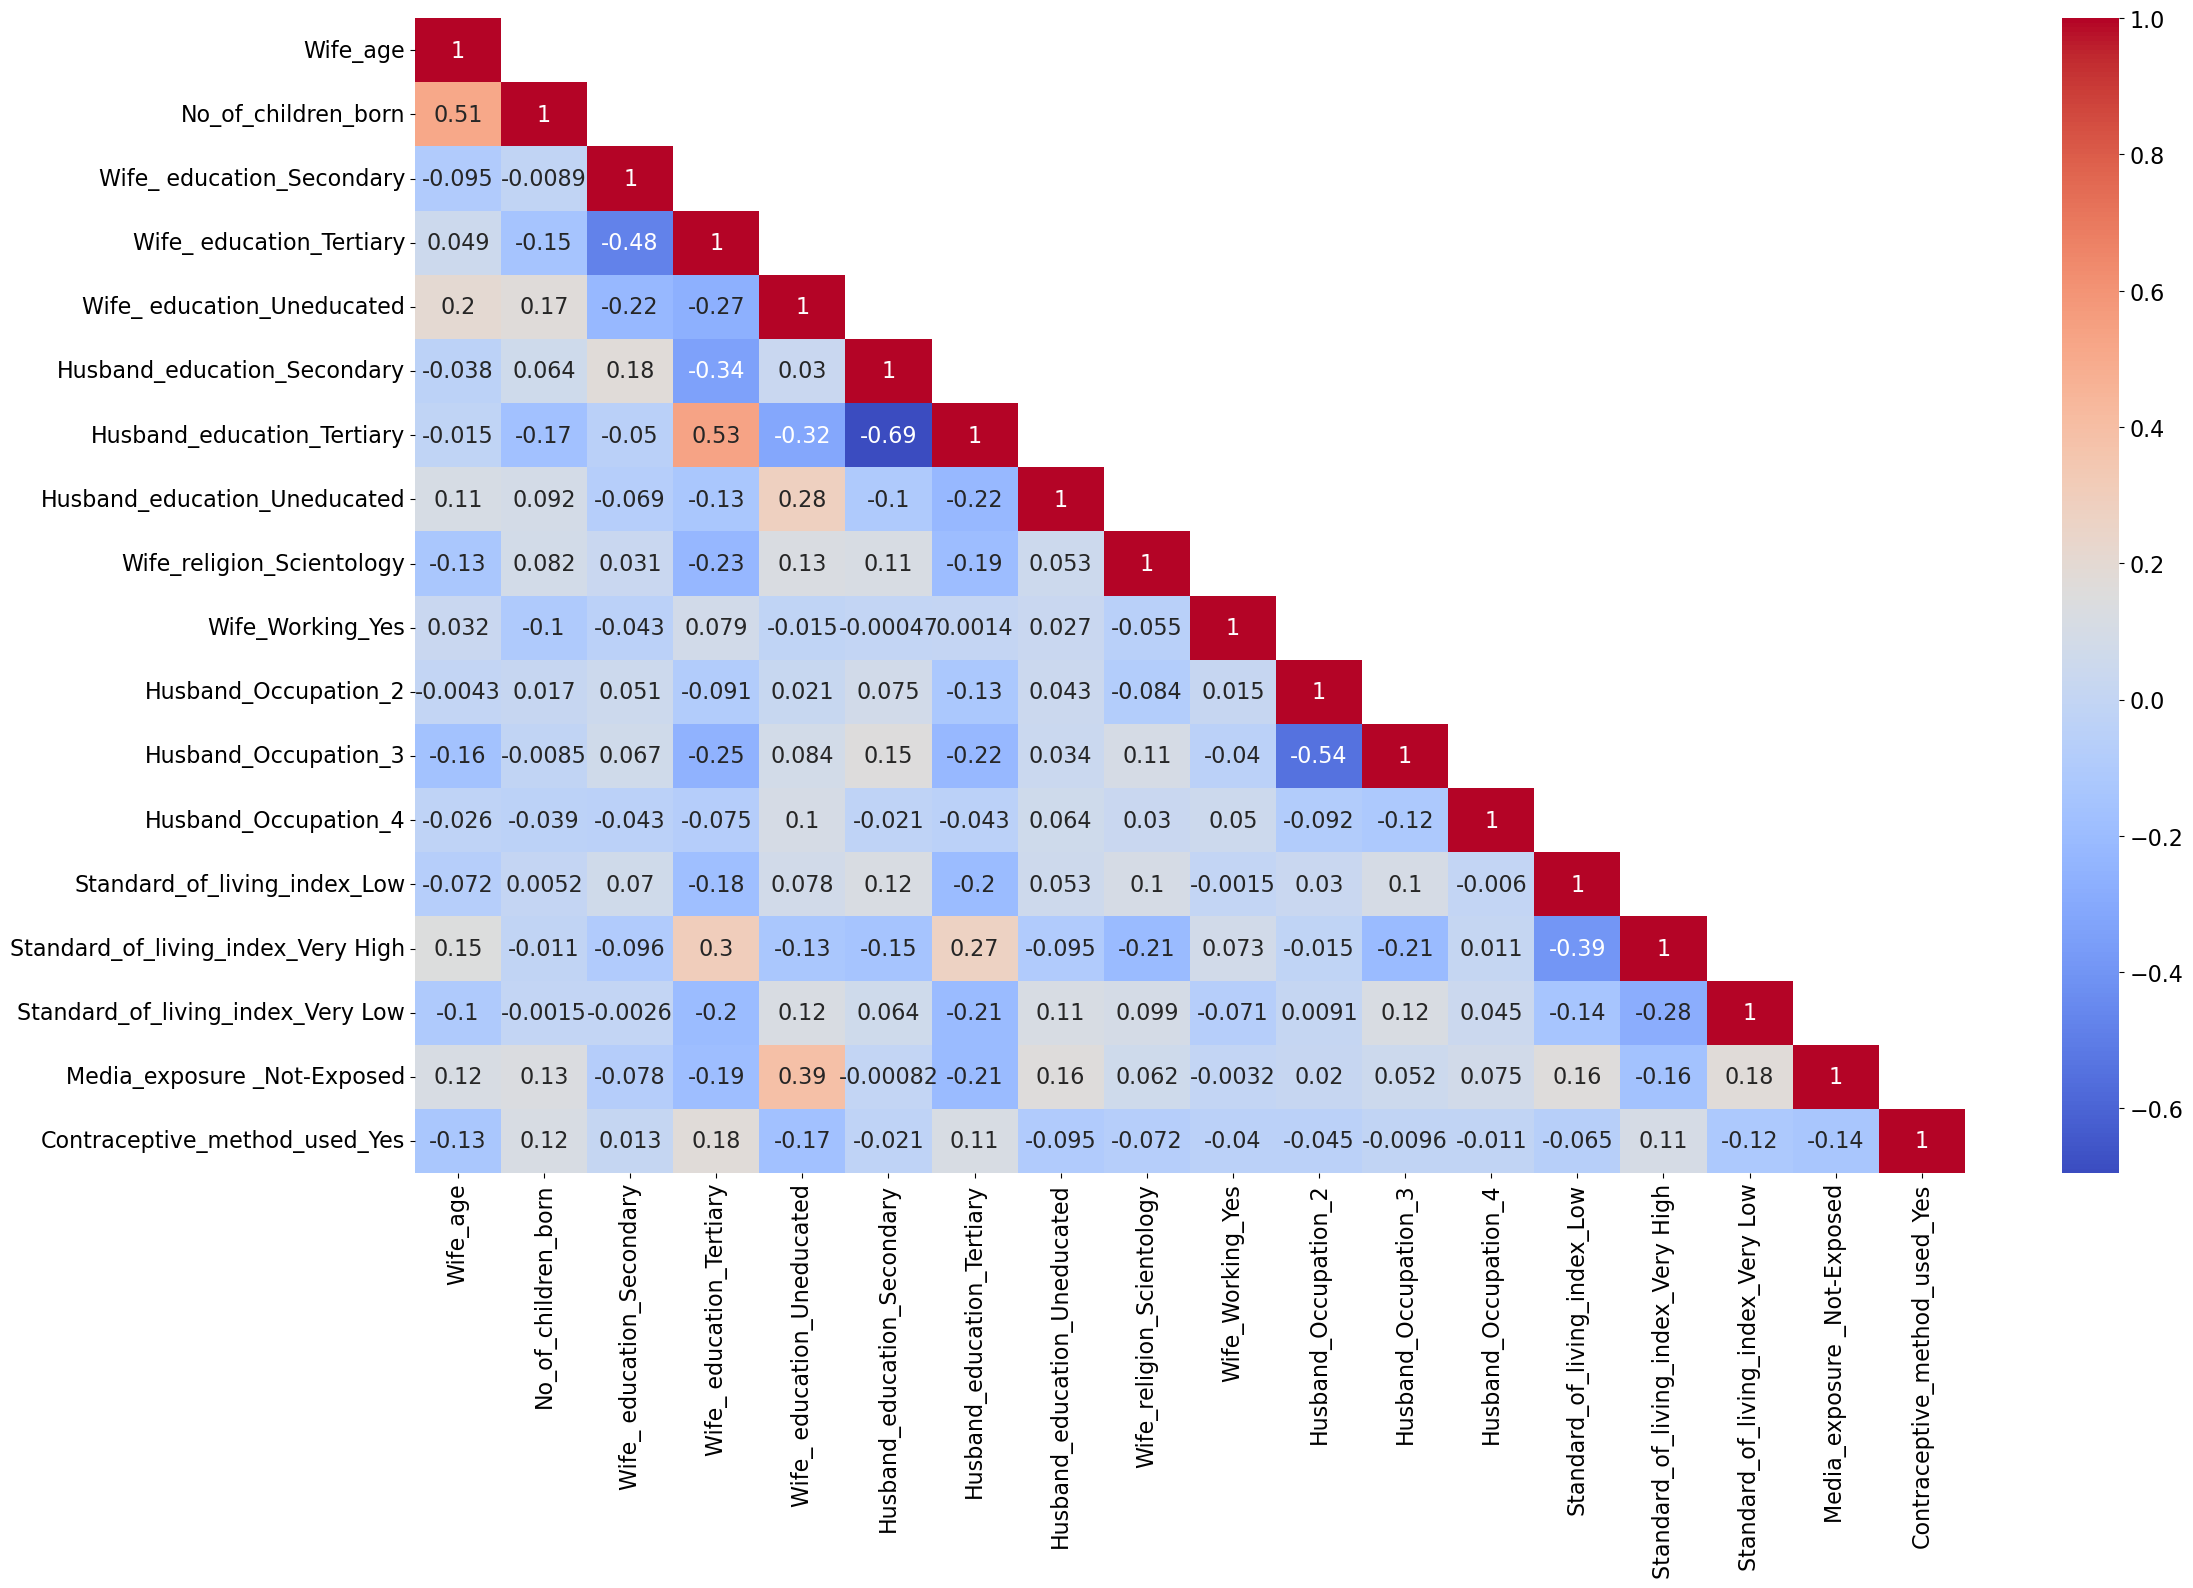

In [39]:
plt.figure(figsize=(25,15))
sns.heatmap(data_mod.corr(), annot=True, mask=np.triu(data_mod.corr(),1), cmap = 'coolwarm')
plt.show()

In [40]:
data_mod.corrwith(data_mod.Contraceptive_method_used_Yes)

Wife_age                             -0.129462
No_of_children_born                   0.116868
Wife_ education_Secondary             0.012824
Wife_ education_Tertiary              0.178752
Wife_ education_Uneducated           -0.166208
Husband_education_Secondary          -0.020708
Husband_education_Tertiary            0.112787
Husband_education_Uneducated         -0.095338
Wife_religion_Scientology            -0.072133
Wife_Working_Yes                     -0.039949
Husband_Occupation_2                 -0.044888
Husband_Occupation_3                 -0.009637
Husband_Occupation_4                 -0.010919
Standard_of_living_index_Low         -0.064518
Standard_of_living_index_Very High    0.105272
Standard_of_living_index_Very Low    -0.116870
Media_exposure _Not-Exposed          -0.138743
Contraceptive_method_used_Yes         1.000000
dtype: float64

In [41]:
data_mod.rename(columns= {'Standard_of_living_index_Very High' : 'Standard_of_living_index_VeryHigh',
                         'Standard_of_living_index_Very Low' : 'Standard_of_living_index_VeryLow',
                         'Wife_ education_Secondary' : 'Wife_education_Secondary',
                         'Wife_ education_Tertiary' : 'Wife_education_Tertiary',
                         'Wife_ education_Uneducated' : 'Wife_education_Uneducated',
                         'Media_exposure _Not-Exposed':'Media_exposure_Not_Exposed'}, inplace = True)

In [42]:
data_mod.columns

Index(['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary', 'Husband_education_Tertiary',
       'Husband_education_Uneducated', 'Wife_religion_Scientology',
       'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3',
       'Husband_Occupation_4', 'Standard_of_living_index_Low',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow',
       'Media_exposure_Not_Exposed', 'Contraceptive_method_used_Yes'],
      dtype='object')

---

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

# Model Building : Logistic Regression

#### Descriptive Approach

In [43]:
import statsmodels.formula.api as SM

- We are building model with backward selection method

### Model 1 

In [44]:
model_1 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Tertiary+Husband_education_Uneducated+Wife_religion_Scientology+Wife_Working_Yes+Husband_Occupation_2+Husband_Occupation_3+Husband_Occupation_4+Standard_of_living_index_Low+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.601779
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1368
Method:                                      MLE   Df Model:                           17
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1236
Time:                                   20:11:01   Log-Likelihood:                -834.07
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 2.147e-40
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.9925      0.440      4.531      0.000       1.131       2.854
Wife_age                             -0.0903      0.010     -9.153      0.000      -0.110      -0.071
No_of_children_born                   0.3430      0.035      9.871      0.000       0.275       0.411
Wife_education_Secondary              0.4575      0.168      2.717      0.007       0.128       0.787
Wife_education_Tertiary               1.1119      0.194      5.736      0.000       0.732       1.492
Wife_education_Uneducated            -0.3266      0.244     -1.336      0.181      -0.806       0.152
Husband_education_Secondary           0.1578      0.214      0.736      0.462      -0.262       0.578
Husband_education_Tertiary           -0.0326      0.222     -0.147      0.883      -0.468       0.403
Husband_education_Uneducated         -0.2796      0.402     -0.696      0.486      -1.067       0.508
Wife_religion_Scientology            -0.4745      0.179     -2.651      0.008      -0.825      -0.124
Wife_Working_Yes                     -0.1227      0.137     -0.893      0.372      -0.392       0.147
Husband_Occupation_2                 -0.1643      0.172     -0.955      0.340      -0.502       0.173
Husband_Occupation_3                  0.0603      0.169      0.356      0.722      -0.272       0.392
Husband_Occupation_4                  0.5349      0.451      1.185      0.236      -0.350       1.420
Standard_of_living_index_Low         -0.1885      0.183     -1.028      0.304      -0.548       0.171
Standard_of_living_index_VeryHigh     0.2160      0.145      1.487      0.137      -0.069       0.501
Standard_of_living_index_VeryLow     -0.5977      0.231     -2.592      0.010      -1.050      -0.146
Media_exposure_Not_Exposed           -0.4851      0.256     -1.897      0.058      -0.986       0.016
=====================================================================================================
"""

In [45]:
def adj_pseudo_r2(model):
    return 1 - (model.llf-model.df_model)/model.llnull  

In [46]:
model_name = []
model_perf = []

model_name.append('Model_1')
model_perf.append(adj_pseudo_r2(model_1))

In [47]:
adj_pseudo_r2(model_1)

0.10571928520273821

In [48]:
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (xvar_names[i], " VIF = " , vif)

In [49]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary', 'Husband_education_Tertiary',
       'Husband_education_Uneducated', 'Wife_religion_Scientology',
       'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3',
       'Husband_Occupation_4', 'Standard_of_living_index_Low',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow',
       'Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.61
No_of_children_born  VIF =  1.49
Wife_education_Secondary  VIF =  1.73
Wife_education_Tertiary  VIF =  2.47
Wife_education_Uneducated  VIF =  1.57
Husband_education_Secondary  VIF =  2.47
Husband_education_Tertiary  VIF =  3.47
Husband_education_Uneducated  VIF =  1.25
Wife_religion_Scientology  VIF =  1.15
Wife_Working_Yes  VIF =  1.04
Husband_Occupation_2  VIF =  1.77
Husband_Occupation_3  VIF =  1.96
Husband_Occupation_4  VIF =  1.12
Standard_of_living_index_Low  VIF =  1.36
Standard_of_living_index_VeryHigh  VIF =  1.48
Standard_of_living_index_VeryLow  VIF =  1.29
Media_exposure_Not_Exposed  VIF =  1.27


- VIF Values for all the columns seems to be not significant(There is no much multicolinearity), so we can drop features based on p values.
- P-Value for some features are very high. Those features are not statistically important. We can drop the feature iwth the higher P value.

### Model 2 : Dropping "+Husband_education_Tertiary"

In [50]:
model_2 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Uneducated+Wife_religion_Scientology+Wife_Working_Yes+Husband_Occupation_2+Husband_Occupation_3+Husband_Occupation_4+Standard_of_living_index_Low+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.601787
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1369
Method:                                      MLE   Df Model:                           16
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1236
Time:                                   20:11:02   Log-Likelihood:                -834.08
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 5.545e-41
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.9671      0.404      4.866      0.000       1.175       2.759
Wife_age                             -0.0903      0.010     -9.157      0.000      -0.110      -0.071
No_of_children_born                   0.3434      0.035      9.912      0.000       0.275       0.411
Wife_education_Secondary              0.4511      0.163      2.773      0.006       0.132       0.770
Wife_education_Tertiary               1.1025      0.183      6.030      0.000       0.744       1.461
Wife_education_Uneducated            -0.3228      0.243     -1.328      0.184      -0.799       0.153
Husband_education_Secondary           0.1804      0.149      1.207      0.228      -0.113       0.473
Husband_education_Uneducated         -0.2628      0.385     -0.683      0.495      -1.017       0.492
Wife_religion_Scientology            -0.4734      0.179     -2.648      0.008      -0.824      -0.123
Wife_Working_Yes                     -0.1218      0.137     -0.888      0.375      -0.391       0.147
Husband_Occupation_2                 -0.1607      0.170     -0.943      0.345      -0.495       0.173
Husband_Occupation_3                  0.0633      0.168      0.377      0.706      -0.266       0.393
Husband_Occupation_4                  0.5378      0.451      1.193      0.233      -0.346       1.421
Standard_of_living_index_Low         -0.1860      0.183     -1.019      0.308      -0.544       0.172
Standard_of_living_index_VeryHigh     0.2158      0.145      1.486      0.137      -0.069       0.500
Standard_of_living_index_VeryLow     -0.5944      0.229     -2.590      0.010      -1.044      -0.145
Media_exposure_Not_Exposed           -0.4821      0.255     -1.891      0.059      -0.982       0.018
=====================================================================================================
"""

- Still there is a multicolinearity with the features, as we see the p value for few columns are very high.

In [51]:
model_name.append('Model_2')
model_perf.append(adj_pseudo_r2(model_2))

In [52]:
adj_pseudo_r2(model_2)

0.10675875503391186

In [53]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary',
       'Husband_education_Uneducated', 'Wife_religion_Scientology',
       'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3',
       'Husband_Occupation_4', 'Standard_of_living_index_Low',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow',
       'Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.61
No_of_children_born  VIF =  1.48
Wife_education_Secondary  VIF =  1.62
Wife_education_Tertiary  VIF =  2.19
Wife_education_Uneducated  VIF =  1.55
Husband_education_Secondary  VIF =  1.2
Husband_education_Uneducated  VIF =  1.14
Wife_religion_Scientology  VIF =  1.14
Wife_Working_Yes  VIF =  1.04
Husband_Occupation_2  VIF =  1.74
Husband_Occupation_3  VIF =  1.92
Husband_Occupation_4  VIF =  1.12
Standard_of_living_index_Low  VIF =  1.35
Standard_of_living_index_VeryHigh  VIF =  1.48
Standard_of_living_index_VeryLow  VIF =  1.28
Media_exposure_Not_Exposed  VIF =  1.26


- P value for "Husband_Occupation_3" is very high(71%), we can drop the feature.

### Model 3 : Dropping "Husband_Occupation_3"

In [54]:
model_3 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Husband_education_Uneducated+Wife_religion_Scientology+Wife_Working_Yes+Husband_Occupation_2+Husband_Occupation_4+Standard_of_living_index_Low+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.601838
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1370
Method:                                      MLE   Df Model:                           15
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1235
Time:                                   20:11:02   Log-Likelihood:                -834.15
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 1.466e-41
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             2.0388      0.357      5.707      0.000       1.339       2.739
Wife_age                             -0.0910      0.010     -9.358      0.000      -0.110      -0.072
No_of_children_born                   0.3438      0.035      9.927      0.000       0.276       0.412
Wife_education_Secondary              0.4455      0.162      2.751      0.006       0.128       0.763
Wife_education_Tertiary               1.0837      0.176      6.166      0.000       0.739       1.428
Wife_education_Uneducated            -0.3196      0.243     -1.316      0.188      -0.796       0.156
Husband_education_Secondary           0.1871      0.148      1.261      0.207      -0.104       0.478
Husband_education_Uneducated         -0.2560      0.384     -0.666      0.505      -1.009       0.497
Wife_religion_Scientology            -0.4802      0.178     -2.698      0.007      -0.829      -0.131
Wife_Working_Yes                     -0.1210      0.137     -0.882      0.378      -0.390       0.148
Husband_Occupation_2                 -0.2018      0.131     -1.541      0.123      -0.458       0.055
Husband_Occupation_4                  0.4913      0.433      1.134      0.257      -0.358       1.341
Standard_of_living_index_Low         -0.1833      0.182     -1.005      0.315      -0.541       0.174
Standard_of_living_index_VeryHigh     0.2108      0.145      1.458      0.145      -0.073       0.494
Standard_of_living_index_VeryLow     -0.5904      0.229     -2.576      0.010      -1.040      -0.141
Media_exposure_Not_Exposed           -0.4831      0.255     -1.894      0.058      -0.983       0.017
=====================================================================================================
"""

In [55]:
model_name.append('Model_3')
model_perf.append(adj_pseudo_r2(model_3))

In [56]:
adj_pseudo_r2(model_3)

0.10773489538130332

In [57]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary',
       'Husband_education_Uneducated', 'Wife_religion_Scientology',
       'Wife_Working_Yes', 'Husband_Occupation_2',
       'Husband_Occupation_4', 'Standard_of_living_index_Low',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow',
       'Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.55
No_of_children_born  VIF =  1.48
Wife_education_Secondary  VIF =  1.61
Wife_education_Tertiary  VIF =  2.04
Wife_education_Uneducated  VIF =  1.54
Husband_education_Secondary  VIF =  1.19
Husband_education_Uneducated  VIF =  1.14
Wife_religion_Scientology  VIF =  1.14
Wife_Working_Yes  VIF =  1.04
Husband_Occupation_2  VIF =  1.04
Husband_Occupation_4  VIF =  1.04
Standard_of_living_index_Low  VIF =  1.35
Standard_of_living_index_VeryHigh  VIF =  1.47
Standard_of_living_index_VeryLow  VIF =  1.28
Media_exposure_Not_Exposed  VIF =  1.26


 - Here we are dropping "Husband_education_Uneducated" based on P value.

### Model 4 : Dropping "Husband_education_Uneducated"

In [58]:
model_4 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Wife_Working_Yes+Wife_religion_Scientology+Husband_Occupation_2+Husband_Occupation_4+Standard_of_living_index_Low+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.602001
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1371
Method:                                      MLE   Df Model:                           14
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1233
Time:                                   20:11:03   Log-Likelihood:                -834.37
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 4.335e-42
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             2.0421      0.357      5.718      0.000       1.342       2.742
Wife_age                             -0.0913      0.010     -9.404      0.000      -0.110      -0.072
No_of_children_born                   0.3434      0.035      9.923      0.000       0.276       0.411
Wife_education_Secondary              0.4502      0.162      2.783      0.005       0.133       0.767
Wife_education_Tertiary               1.0940      0.175      6.247      0.000       0.751       1.437
Wife_education_Uneducated            -0.3457      0.240     -1.442      0.149      -0.816       0.124
Husband_education_Secondary           0.2019      0.147      1.375      0.169      -0.086       0.490
Wife_Working_Yes                     -0.1243      0.137     -0.907      0.365      -0.393       0.144
Wife_religion_Scientology            -0.4829      0.178     -2.714      0.007      -0.832      -0.134
Husband_Occupation_2                 -0.2063      0.131     -1.578      0.115      -0.463       0.050
Husband_Occupation_4                  0.4823      0.432      1.116      0.265      -0.365       1.329
Standard_of_living_index_Low         -0.1866      0.182     -1.024      0.306      -0.544       0.171
Standard_of_living_index_VeryHigh     0.2138      0.145      1.479      0.139      -0.069       0.497
Standard_of_living_index_VeryLow     -0.5995      0.229     -2.621      0.009      -1.048      -0.151
Media_exposure_Not_Exposed           -0.4869      0.255     -1.911      0.056      -0.986       0.013
=====================================================================================================
"""

In [59]:
model_name.append('Model_4')
model_perf.append(adj_pseudo_r2(model_4))
adj_pseudo_r2(model_4)

0.10854876384957857

In [60]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary',
       'Wife_Working_Yes', 'Wife_religion_Scientology',
       'Husband_Occupation_2',
       'Husband_Occupation_4', 'Standard_of_living_index_Low',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow',
       'Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.54
No_of_children_born  VIF =  1.48
Wife_education_Secondary  VIF =  1.6
Wife_education_Tertiary  VIF =  2.03
Wife_education_Uneducated  VIF =  1.5
Husband_education_Secondary  VIF =  1.16
Wife_Working_Yes  VIF =  1.03
Wife_religion_Scientology  VIF =  1.14
Husband_Occupation_2  VIF =  1.03
Husband_Occupation_4  VIF =  1.04
Standard_of_living_index_Low  VIF =  1.35
Standard_of_living_index_VeryHigh  VIF =  1.47
Standard_of_living_index_VeryLow  VIF =  1.27
Media_exposure_Not_Exposed  VIF =  1.26


### Model 5 : Dropping "Wife_Working_Yes"

In [61]:
model_5 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Wife_religion_Scientology+Husband_Occupation_2+Husband_Occupation_4+Standard_of_living_index_Low+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.602297
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1372
Method:                                      MLE   Df Model:                           13
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1228
Time:                                   20:11:03   Log-Likelihood:                -834.78
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 1.474e-42
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             2.0274      0.357      5.684      0.000       1.328       2.727
Wife_age                             -0.0919      0.010     -9.488      0.000      -0.111      -0.073
No_of_children_born                   0.3469      0.034     10.078      0.000       0.279       0.414
Wife_education_Secondary              0.4505      0.162      2.785      0.005       0.133       0.768
Wife_education_Tertiary               1.0863      0.175      6.218      0.000       0.744       1.429
Wife_education_Uneducated            -0.3448      0.240     -1.438      0.150      -0.815       0.125
Husband_education_Secondary           0.1956      0.147      1.334      0.182      -0.092       0.483
Wife_religion_Scientology            -0.4830      0.178     -2.714      0.007      -0.832      -0.134
Husband_Occupation_2                 -0.2100      0.131     -1.607      0.108      -0.466       0.046
Husband_Occupation_4                  0.4634      0.430      1.077      0.282      -0.380       1.307
Standard_of_living_index_Low         -0.1891      0.182     -1.038      0.299      -0.546       0.168
Standard_of_living_index_VeryHigh     0.2083      0.144      1.443      0.149      -0.075       0.491
Standard_of_living_index_VeryLow     -0.5911      0.228     -2.587      0.010      -1.039      -0.143
Media_exposure_Not_Exposed           -0.4958      0.255     -1.946      0.052      -0.995       0.003
=====================================================================================================
"""

In [62]:
model_name.append('model_5')
model_perf.append(adj_pseudo_r2(model_5))
adj_pseudo_r2(model_5)

0.10916841063526672

In [63]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary',
       'Wife_religion_Scientology',
       'Husband_Occupation_2',
       'Husband_Occupation_4', 'Standard_of_living_index_Low',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow',
       'Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.53
No_of_children_born  VIF =  1.45
Wife_education_Secondary  VIF =  1.6
Wife_education_Tertiary  VIF =  2.02
Wife_education_Uneducated  VIF =  1.5
Husband_education_Secondary  VIF =  1.16
Wife_religion_Scientology  VIF =  1.14
Husband_Occupation_2  VIF =  1.03
Husband_Occupation_4  VIF =  1.04
Standard_of_living_index_Low  VIF =  1.34
Standard_of_living_index_VeryHigh  VIF =  1.46
Standard_of_living_index_VeryLow  VIF =  1.27
Media_exposure_Not_Exposed  VIF =  1.26


- based on p value we are dopping "Standard_of_living_index_Low"

### Model 6 : dropping "+Standard_of_living_index_Low"

In [64]:
model_6 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Wife_religion_Scientology+Husband_Occupation_2+Husband_Occupation_4+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_6.summary()

Optimization terminated successfully.
         Current function value: 0.602686
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1373
Method:                                      MLE   Df Model:                           12
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1223
Time:                                   20:11:03   Log-Likelihood:                -835.32
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 5.453e-43
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.9533      0.349      5.595      0.000       1.269       2.638
Wife_age                             -0.0917      0.010     -9.459      0.000      -0.111      -0.073
No_of_children_born                   0.3475      0.034     10.095      0.000       0.280       0.415
Wife_education_Secondary              0.4526      0.162      2.800      0.005       0.136       0.769
Wife_education_Tertiary               1.0984      0.174      6.302      0.000       0.757       1.440
Wife_education_Uneducated            -0.3445      0.239     -1.439      0.150      -0.814       0.125
Husband_education_Secondary           0.1862      0.146      1.273      0.203      -0.100       0.473
Wife_religion_Scientology            -0.4857      0.178     -2.728      0.006      -0.835      -0.137
Husband_Occupation_2                 -0.2118      0.131     -1.622      0.105      -0.468       0.044
Husband_Occupation_4                  0.4658      0.430      1.084      0.279      -0.377       1.308
Standard_of_living_index_VeryHigh     0.2694      0.132      2.048      0.041       0.012       0.527
Standard_of_living_index_VeryLow     -0.5149      0.216     -2.380      0.017      -0.939      -0.091
Media_exposure_Not_Exposed           -0.5332      0.252     -2.114      0.034      -1.027      -0.039
=====================================================================================================
"""

In [65]:
model_name.append('model_6')
model_perf.append(adj_pseudo_r2(model_6))
adj_pseudo_r2(model_6)

0.10965307996319851

In [66]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary',
       'Wife_religion_Scientology',
       'Husband_Occupation_2',
       'Husband_Occupation_4',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow',
       'Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.53
No_of_children_born  VIF =  1.45
Wife_education_Secondary  VIF =  1.6
Wife_education_Tertiary  VIF =  2.01
Wife_education_Uneducated  VIF =  1.5
Husband_education_Secondary  VIF =  1.15
Wife_religion_Scientology  VIF =  1.14
Husband_Occupation_2  VIF =  1.03
Husband_Occupation_4  VIF =  1.04
Standard_of_living_index_VeryHigh  VIF =  1.23
Standard_of_living_index_VeryLow  VIF =  1.14
Media_exposure_Not_Exposed  VIF =  1.24


- dropping "Husband_Occupation_4" based on p value

### Model 7 : Dropping "+Husband_Occupation_4"

In [67]:
model_7 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Husband_education_Secondary+Wife_religion_Scientology+Husband_Occupation_2+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_7.summary()

Optimization terminated successfully.
         Current function value: 0.603110
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1374
Method:                                      MLE   Df Model:                           11
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1216
Time:                                   20:11:03   Log-Likelihood:                -835.91
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 2.032e-43
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.9776      0.348      5.678      0.000       1.295       2.660
Wife_age                             -0.0917      0.010     -9.464      0.000      -0.111      -0.073
No_of_children_born                   0.3453      0.034     10.061      0.000       0.278       0.413
Wife_education_Secondary              0.4409      0.161      2.736      0.006       0.125       0.757
Wife_education_Tertiary               1.0794      0.173      6.231      0.000       0.740       1.419
Wife_education_Uneducated            -0.3301      0.239     -1.380      0.167      -0.799       0.139
Husband_education_Secondary           0.1811      0.146      1.240      0.215      -0.105       0.467
Wife_religion_Scientology            -0.4842      0.178     -2.721      0.007      -0.833      -0.135
Husband_Occupation_2                 -0.2250      0.130     -1.732      0.083      -0.480       0.030
Standard_of_living_index_VeryHigh     0.2774      0.131      2.112      0.035       0.020       0.535
Standard_of_living_index_VeryLow     -0.5100      0.216     -2.358      0.018      -0.934      -0.086
Media_exposure_Not_Exposed           -0.5176      0.252     -2.058      0.040      -1.011      -0.025
=====================================================================================================
"""

In [68]:
model_name.append('model_7')
model_perf.append(adj_pseudo_r2(model_7))
adj_pseudo_r2(model_7)

0.11008533449070013

In [69]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary',
       'Wife_religion_Scientology',
       'Husband_Occupation_2',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.53
No_of_children_born  VIF =  1.45
Wife_education_Secondary  VIF =  1.6
Wife_education_Tertiary  VIF =  2.0
Wife_education_Uneducated  VIF =  1.5
Husband_education_Secondary  VIF =  1.15
Wife_religion_Scientology  VIF =  1.14
Husband_Occupation_2  VIF =  1.02
Standard_of_living_index_VeryHigh  VIF =  1.22
Standard_of_living_index_VeryLow  VIF =  1.14
Media_exposure_Not_Exposed  VIF =  1.23


- dropping "Husband_Education_Secondary" on p value.

### Model 8 : dropping "Husband_education_Secondary"

In [70]:
model_8 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated+Wife_religion_Scientology+Husband_Occupation_2+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_8.summary()

Optimization terminated successfully.
         Current function value: 0.603667
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1375
Method:                                      MLE   Df Model:                           10
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1208
Time:                                   20:11:03   Log-Likelihood:                -836.68
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 8.634e-44
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             2.0376      0.345      5.910      0.000       1.362       2.713
Wife_age                             -0.0916      0.010     -9.470      0.000      -0.111      -0.073
No_of_children_born                   0.3457      0.034     10.087      0.000       0.278       0.413
Wife_education_Secondary              0.4386      0.161      2.723      0.006       0.123       0.754
Wife_education_Tertiary               1.0220      0.167      6.133      0.000       0.695       1.349
Wife_education_Uneducated            -0.3440      0.239     -1.441      0.150      -0.812       0.124
Wife_religion_Scientology            -0.4766      0.178     -2.681      0.007      -0.825      -0.128
Husband_Occupation_2                 -0.2160      0.130     -1.666      0.096      -0.470       0.038
Standard_of_living_index_VeryHigh     0.2686      0.131      2.049      0.040       0.012       0.526
Standard_of_living_index_VeryLow     -0.5078      0.216     -2.349      0.019      -0.931      -0.084
Media_exposure_Not_Exposed           -0.5382      0.251     -2.143      0.032      -1.031      -0.046
=====================================================================================================
"""

In [71]:
model_name.append('model_8')
model_perf.append(adj_pseudo_r2(model_8))
adj_pseudo_r2(model_8)

0.11032592210099534

In [72]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Wife_religion_Scientology',
       'Husband_Occupation_2',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.53
No_of_children_born  VIF =  1.45
Wife_education_Secondary  VIF =  1.6
Wife_education_Tertiary  VIF =  1.86
Wife_education_Uneducated  VIF =  1.49
Wife_religion_Scientology  VIF =  1.13
Husband_Occupation_2  VIF =  1.02
Standard_of_living_index_VeryHigh  VIF =  1.22
Standard_of_living_index_VeryLow  VIF =  1.14
Media_exposure_Not_Exposed  VIF =  1.23


- dropping "Wife_education_Uneducated" on p values.

### Model 9 : dropping "Wife_education_Uneducated"

In [73]:
model_9 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_religion_Scientology+Husband_Occupation_2+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_9.summary()

Optimization terminated successfully.
         Current function value: 0.604422
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1376
Method:                                      MLE   Df Model:                            9
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1197
Time:                                   20:11:04   Log-Likelihood:                -837.73
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 4.563e-44
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             2.0274      0.345      5.881      0.000       1.352       2.703
Wife_age                             -0.0932      0.010     -9.716      0.000      -0.112      -0.074
No_of_children_born                   0.3441      0.034     10.087      0.000       0.277       0.411
Wife_education_Secondary              0.5197      0.151      3.438      0.001       0.223       0.816
Wife_education_Tertiary               1.1010      0.158      6.987      0.000       0.792       1.410
Wife_religion_Scientology            -0.4923      0.178     -2.768      0.006      -0.841      -0.144
Husband_Occupation_2                 -0.2142      0.130     -1.653      0.098      -0.468       0.040
Standard_of_living_index_VeryHigh     0.2712      0.131      2.071      0.038       0.015       0.528
Standard_of_living_index_VeryLow     -0.5092      0.216     -2.358      0.018      -0.932      -0.086
Media_exposure_Not_Exposed           -0.6336      0.242     -2.623      0.009      -1.107      -0.160
=====================================================================================================
"""

In [74]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary',
       'Wife_religion_Scientology',
       'Husband_Occupation_2',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.48
No_of_children_born  VIF =  1.45
Wife_education_Secondary  VIF =  1.39
Wife_education_Tertiary  VIF =  1.63
Wife_religion_Scientology  VIF =  1.13
Husband_Occupation_2  VIF =  1.02
Standard_of_living_index_VeryHigh  VIF =  1.22
Standard_of_living_index_VeryLow  VIF =  1.14
Media_exposure_Not_Exposed  VIF =  1.13


In [75]:
model_name.append('model_9')
model_perf.append(adj_pseudo_r2(model_9))
adj_pseudo_r2(model_9)

0.11027702417181373

### Model 10 : dropping "Husband_Occupation_2"

In [76]:
model_10 = SM.logit(formula = 'Contraceptive_method_used_Yes~Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_religion_Scientology+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed' , data=data_mod).fit()
model_10.summary()

Optimization terminated successfully.
         Current function value: 0.605407
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     Contraceptive_method_used_Yes   No. Observations:                 1386
Model:                                     Logit   Df Residuals:                     1377
Method:                                      MLE   Df Model:                            8
Date:                           Wed, 18 Jan 2023   Pseudo R-squ.:                  0.1183
Time:                                   20:11:04   Log-Likelihood:                -839.09
converged:                                  True   LL-Null:                       -951.68
Covariance Type:                       nonrobust   LLR p-value:                 3.119e-44
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.9164      0.337      5.683      0.000       1.256       2.577
Wife_age                             -0.0925      0.010     -9.681      0.000      -0.111      -0.074
No_of_children_born                   0.3415      0.034     10.048      0.000       0.275       0.408
Wife_education_Secondary              0.5165      0.151      3.423      0.001       0.221       0.812
Wife_education_Tertiary               1.1194      0.157      7.130      0.000       0.812       1.427
Wife_religion_Scientology            -0.4597      0.177     -2.603      0.009      -0.806      -0.114
Standard_of_living_index_VeryHigh     0.2723      0.131      2.082      0.037       0.016       0.529
Standard_of_living_index_VeryLow     -0.5084      0.216     -2.355      0.019      -0.931      -0.085
Media_exposure_Not_Exposed           -0.6315      0.241     -2.616      0.009      -1.105      -0.158
=====================================================================================================
"""

In [77]:
model_name.append('model_10')
model_perf.append(adj_pseudo_r2(model_10))
adj_pseudo_r2(model_10)

0.10989253295638735

In [78]:
vif_cal(input_data=data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary',
       'Wife_religion_Scientology',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])

Wife_age  VIF =  1.48
No_of_children_born  VIF =  1.45
Wife_education_Secondary  VIF =  1.39
Wife_education_Tertiary  VIF =  1.62
Wife_religion_Scientology  VIF =  1.12
Standard_of_living_index_VeryHigh  VIF =  1.22
Standard_of_living_index_VeryLow  VIF =  1.14
Media_exposure_Not_Exposed  VIF =  1.13


In [79]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_perf}, index=range(1,11))
model_eval

,model_name,model_perf
1,Model_1,0.105719
2,Model_2,0.106759
3,Model_3,0.107735
4,Model_4,0.108549
5,model_5,0.109168
6,model_6,0.109653
7,model_7,0.110085
8,model_8,0.110326
9,model_9,0.110277
10,model_10,0.109893


#### Descriptive Approach Findings:
    - Dataset has no multicolinearity between the features.(VIF criteria <5)
    - Model 8, Model 9 & Model 10 seems to be the best models with the statistically significant features.
    - Model_8 is having higher Pseudo_R_Square, but some features are having p_value more than 0.05.
    - Model_10 is having features which are statistically significant, but slight decrease in the Pseudo_R_Sqaure.

## Predictive Approach

#### Splitting the data with 70:30 as Train and Test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
Train, Test = train_test_split(data_mod, test_size=0.3, random_state=10, stratify = data_mod['Contraceptive_method_used_Yes'])

In [82]:
print(Train['Contraceptive_method_used_Yes'].value_counts(normalize=True),'\n')
print(Test['Contraceptive_method_used_Yes'].value_counts(normalize=True))

1    0.556701
0    0.443299
Name: Contraceptive_method_used_Yes, dtype: float64 

1    0.557692
0    0.442308
Name: Contraceptive_method_used_Yes, dtype: float64


- The classes in the target feature is balanced.

In [83]:
from sklearn.linear_model import LogisticRegression

#### Model_1 : With all the Features.

In [84]:
# Split columns into independent/predictor variables vs dependent/response/outcome variable
X1 = np.array(data_mod.drop(['Contraceptive_method_used_Yes'], 1))
y1 = np.array(data_mod['Contraceptive_method_used_Yes'])


In [85]:
# Split X and y into training and test set in 70:30 ratio
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=4, stratify = data_mod['Contraceptive_method_used_Yes'])
#stratify to be added

In [86]:
# Fitting a base Logistic Regression model
log_model1 = LogisticRegression(penalty='none')  # With all features
log_model1.fit(X1_train, y1_train)

LogisticRegression(penalty='none')

In [87]:
y1train_predict = log_model1.predict(X1_train)
y1test_predict = log_model1.predict(X1_test)

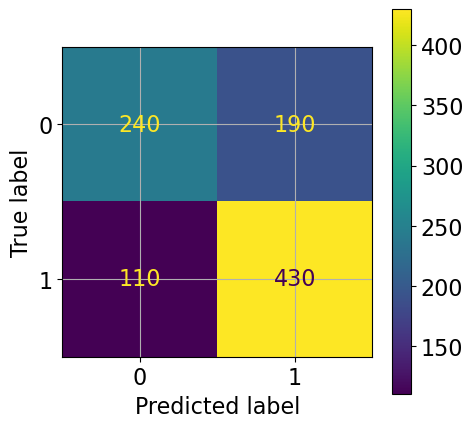

In [88]:
plot_confusion_matrix(log_model1,X1_train,y1_train)

In [89]:
print(classification_report(y1_train, y1train_predict))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       430
           1       0.69      0.80      0.74       540

    accuracy                           0.69       970
   macro avg       0.69      0.68      0.68       970
weighted avg       0.69      0.69      0.69       970



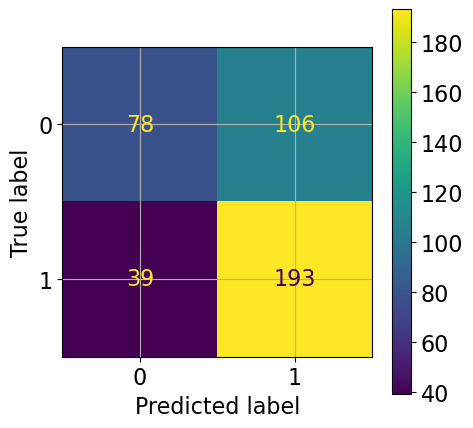

In [90]:
plot_confusion_matrix(log_model1,X1_test,y1_test);

In [91]:
print(classification_report(y1_test, y1test_predict))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52       184
           1       0.65      0.83      0.73       232

    accuracy                           0.65       416
   macro avg       0.66      0.63      0.62       416
weighted avg       0.65      0.65      0.63       416



In [92]:
tn1, fp1, fn1, tp1 = confusion_matrix(y1_test, y1test_predict).ravel()

In [93]:
tn1,fp1,fn1,tp1

(78, 106, 39, 193)

In [94]:
resultsDf = pd.DataFrame({'Classification Technique':[],'Train accuracy':[],'Test accuracy':[]})

In [95]:
resultsDf = resultsDf.append({'Classification Technique':'Logistic Regression 1',
                              'Train accuracy':log_model1.score(X1_train,y1_train),
                              'Test accuracy':log_model1.score(X1_test,y1_test)},ignore_index=True)

Train AUC: 0.733
Test AUC: 0.733


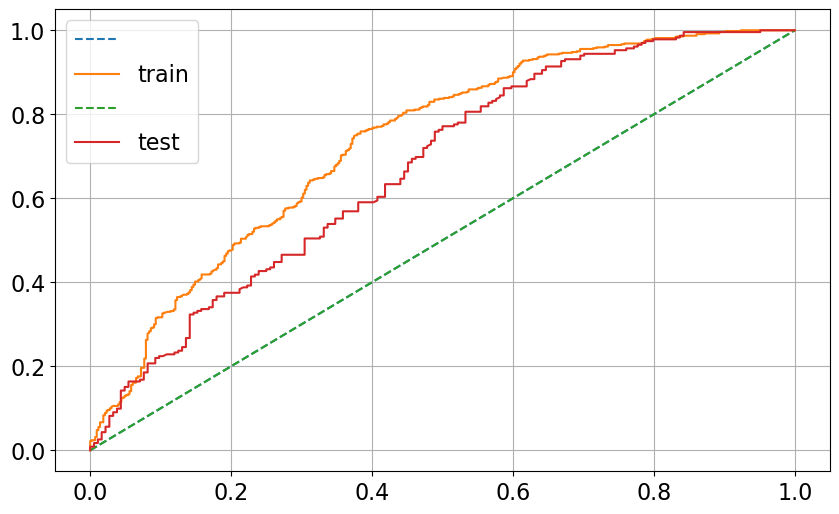

In [96]:

## Logistic Regression

# predict probabilities
plt.figure(figsize=(10,6))
probs = log_model1.predict_proba(X1_train)
probs = probs[:, 1]  # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y1_train, probs)
print('Train AUC: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr); # plot the roc curve for the model


#------------------------------------------------------------------------------------------------------------------


# predict probabilities
probs = log_model1.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y1_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

plt.legend(["","train","","test"])

In [97]:
data_mod.columns

Index(['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
       'Wife_education_Tertiary', 'Wife_education_Uneducated',
       'Husband_education_Secondary', 'Husband_education_Tertiary',
       'Husband_education_Uneducated', 'Wife_religion_Scientology',
       'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3',
       'Husband_Occupation_4', 'Standard_of_living_index_Low',
       'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow',
       'Media_exposure_Not_Exposed', 'Contraceptive_method_used_Yes'],
      dtype='object')

#### Model 8 : Features from Descriptive Approach Model_8


In [98]:
# Features of descriptive model_8
X2 = np.array(data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                         'Wife_education_Tertiary', 'Wife_education_Uneducated',
                         'Wife_religion_Scientology','Husband_Occupation_2',
                         'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])
y2 = np.array(data_mod['Contraceptive_method_used_Yes'])

In [99]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30 , random_state=4, stratify = data_mod['Contraceptive_method_used_Yes'])

In [100]:
log_model2 = LogisticRegression(penalty='none') 
log_model2.fit(X2_train, y2_train)

LogisticRegression(penalty='none')

In [101]:
y2train_predict = log_model2.predict(X2_train)
y2test_predict = log_model2.predict(X2_test)

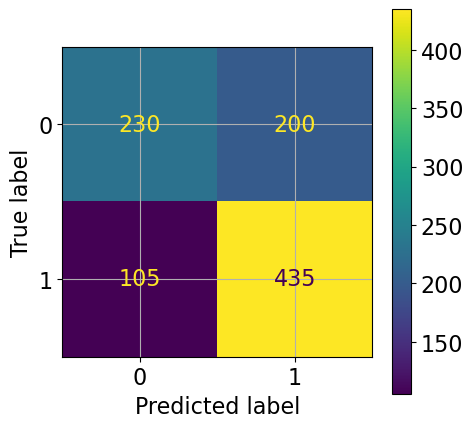

In [102]:
plot_confusion_matrix(log_model2,X2_train,y2_train)

In [103]:
print(classification_report(y2_train, y2train_predict))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       430
           1       0.69      0.81      0.74       540

    accuracy                           0.69       970
   macro avg       0.69      0.67      0.67       970
weighted avg       0.69      0.69      0.68       970



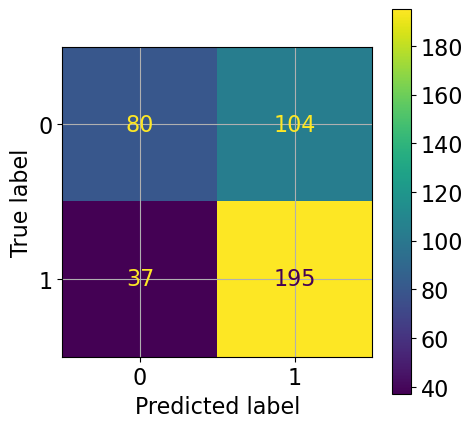

In [104]:
plot_confusion_matrix(log_model2,X2_test,y2_test)

In [105]:
print(classification_report(y2_test, y2test_predict))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53       184
           1       0.65      0.84      0.73       232

    accuracy                           0.66       416
   macro avg       0.67      0.64      0.63       416
weighted avg       0.67      0.66      0.64       416



In [106]:
resultsDf = resultsDf.append({'Classification Technique':'Logistic Regression 8',
                              'Train accuracy':log_model2.score(X2_train,y2_train),
                              'Test accuracy':log_model2.score(X2_test,y2_test)},ignore_index=True)

Train AUC: 0.726
Test AUC: 0.726


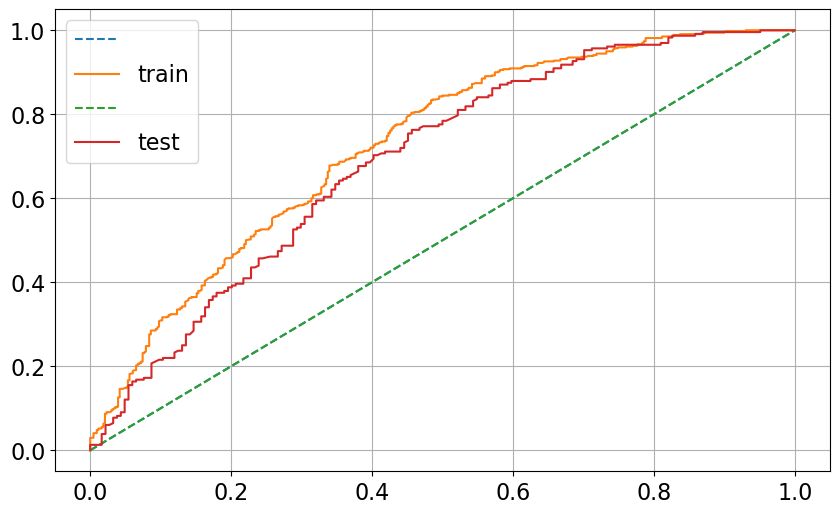

In [107]:

## Logistic Regression

# predict probabilities
plt.figure(figsize=(10,6))
probs = log_model2.predict_proba(X2_train)
probs = probs[:, 1]  # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y2_train, probs)
print('Train AUC: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr); # plot the roc curve for the model


#------------------------------------------------------------------------------------------------------------------


# predict probabilities
probs = log_model2.predict_proba(X2_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y2_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

plt.legend(["","train","","test"])

#### Model_9 : Features from Desriptive Model_9

In [108]:

X3 = np.array(data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                         'Wife_education_Tertiary',
                         'Wife_religion_Scientology','Husband_Occupation_2',
                         'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])
y3 = np.array(data_mod['Contraceptive_method_used_Yes'])

In [109]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30 , random_state=4, stratify = data_mod['Contraceptive_method_used_Yes'])

In [110]:
log_model3 = LogisticRegression(penalty='none') 
log_model3.fit(X3_train, y3_train)

LogisticRegression(penalty='none')

In [111]:
y3train_predict = log_model3.predict(X3_train)
y3test_predict = log_model3.predict(X3_test)

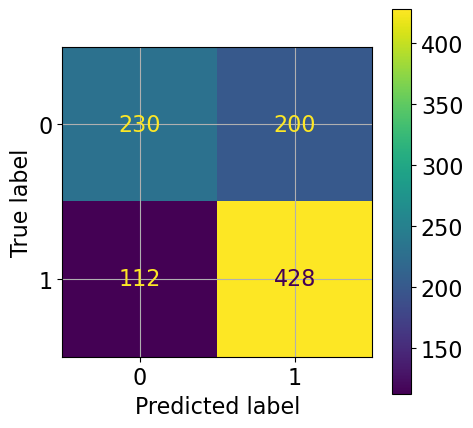

In [112]:
plot_confusion_matrix(log_model3,X3_train,y3_train)

In [113]:
print(classification_report(y3_train, y3train_predict))

              precision    recall  f1-score   support

           0       0.67      0.53      0.60       430
           1       0.68      0.79      0.73       540

    accuracy                           0.68       970
   macro avg       0.68      0.66      0.66       970
weighted avg       0.68      0.68      0.67       970



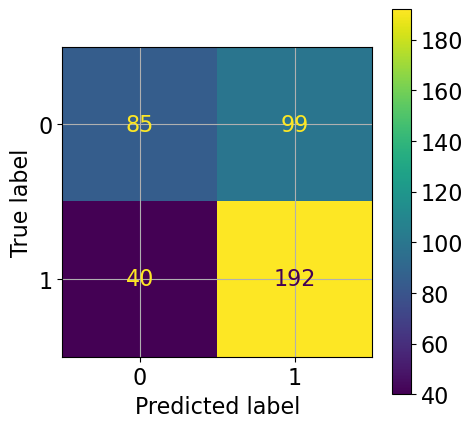

In [114]:
plot_confusion_matrix(log_model3,X3_test,y3_test)

In [115]:
print(classification_report(y3_test, y3test_predict))

              precision    recall  f1-score   support

           0       0.68      0.46      0.55       184
           1       0.66      0.83      0.73       232

    accuracy                           0.67       416
   macro avg       0.67      0.64      0.64       416
weighted avg       0.67      0.67      0.65       416



In [116]:
resultsDf = resultsDf.append({'Classification Technique':'Logistic Regression 9',
                              'Train accuracy':log_model3.score(X3_train,y3_train),
                              'Test accuracy':log_model3.score(X3_test,y3_test)},ignore_index=True)

Train AUC: 0.725
Test AUC: 0.725


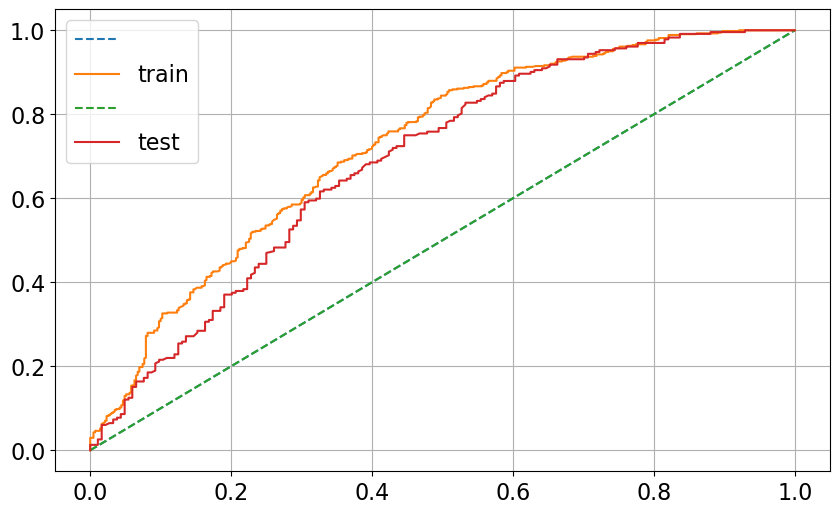

In [117]:

## Logistic Regression

# predict probabilities
plt.figure(figsize=(10,6))
probs = log_model3.predict_proba(X3_train)
probs = probs[:, 1]  # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y3_train, probs)
print('Train AUC: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr); # plot the roc curve for the model


#------------------------------------------------------------------------------------------------------------------


# predict probabilities
probs = log_model3.predict_proba(X3_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y3_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

plt.legend(["","train","","test"])

#### Model_10 : Features of descriptive model_10

In [118]:
# Features of descriptive model_10 - With all features having P value less than 0.05
X4 = np.array(data_mod[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                         'Wife_education_Tertiary','Wife_religion_Scientology',
                         'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])
y4 = np.array(data_mod['Contraceptive_method_used_Yes'])

In [119]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30 , random_state=4, stratify = data_mod['Contraceptive_method_used_Yes'])

In [120]:
log_model4 = LogisticRegression(penalty='none') 
log_model4.fit(X4_train, y4_train)

LogisticRegression(penalty='none')

In [121]:
y4train_predict = log_model4.predict(X4_train)
y4test_predict = log_model4.predict(X4_test)

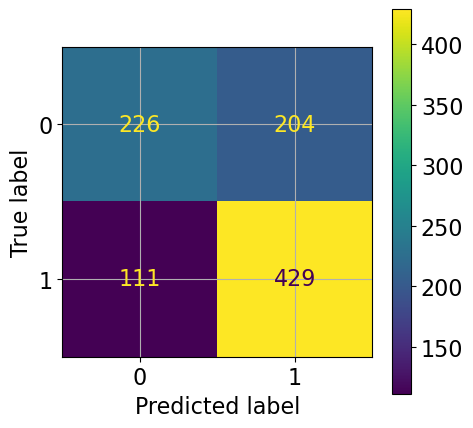

In [122]:
plot_confusion_matrix(log_model4,X4_train,y4_train)

In [123]:
print(classification_report(y4_train, y4train_predict))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59       430
           1       0.68      0.79      0.73       540

    accuracy                           0.68       970
   macro avg       0.67      0.66      0.66       970
weighted avg       0.67      0.68      0.67       970



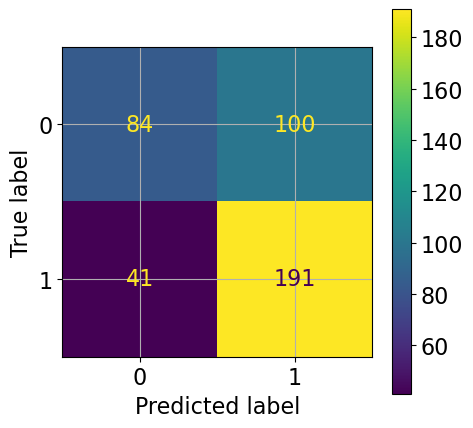

In [124]:
plot_confusion_matrix(log_model4,X4_test,y4_test)

In [125]:
print(classification_report(y4_test, y4test_predict))

              precision    recall  f1-score   support

           0       0.67      0.46      0.54       184
           1       0.66      0.82      0.73       232

    accuracy                           0.66       416
   macro avg       0.66      0.64      0.64       416
weighted avg       0.66      0.66      0.65       416



In [126]:
resultsDf = resultsDf.append({'Classification Technique':'Logistic Regression 10',
                              'Train accuracy':log_model4.score(X4_train,y4_train),
                              'Test accuracy':log_model4.score(X4_test,y4_test)},ignore_index=True)

Train AUC: 0.723
Test AUC: 0.723


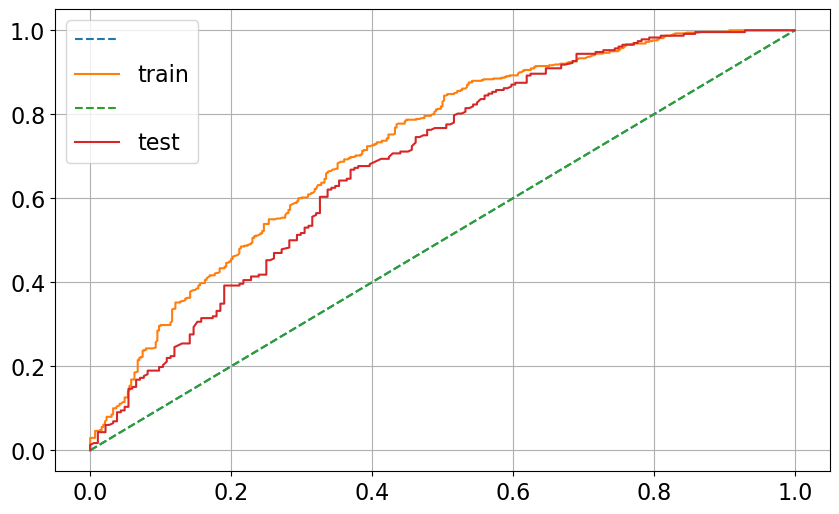

In [127]:

## Logistic Regression

# predict probabilities
plt.figure(figsize=(10,6))
probs = log_model4.predict_proba(X4_train)
probs = probs[:, 1]  # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y4_train, probs)
print('Train AUC: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y4_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr); # plot the roc curve for the model


#------------------------------------------------------------------------------------------------------------------


# predict probabilities
probs = log_model4.predict_proba(X4_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y4_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y4_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

plt.legend(["","train","","test"])

In [128]:
resultsDf

,Classification Technique,Train accuracy,Test accuracy
0,Logistic Regression 1,0.690722,0.651442
1,Logistic Regression 8,0.685567,0.661058
2,Logistic Regression 9,0.678351,0.665865
3,Logistic Regression 10,0.675258,0.661058


### Out of the above 4 models 2nd model in Logistic Regression seems to be the best model as considering the performace with reduced number of features

#### We can observe that the model performance is almost same with reduced number of features

In [129]:
model_sk_1 = LogisticRegression(penalty='none')
# With all features
model_sk_1 = model_sk_1.fit(Train[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                                   'Wife_education_Tertiary', 'Wife_education_Uneducated',
                                   'Husband_education_Secondary', 'Husband_education_Tertiary',
                                   'Husband_education_Uneducated', 'Wife_religion_Scientology',
                                   'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3',
                                   'Husband_Occupation_4', 'Standard_of_living_index_Low',
                                   'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']], Train['Contraceptive_method_used_Yes'])
# Predicting on the Training Data
model_sk_1_pred_train = model_sk_1.predict(Train[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                                   'Wife_education_Tertiary', 'Wife_education_Uneducated',
                                   'Husband_education_Secondary', 'Husband_education_Tertiary',
                                   'Husband_education_Uneducated', 'Wife_religion_Scientology',
                                   'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3',
                                   'Husband_Occupation_4', 'Standard_of_living_index_Low',
                                   'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])
# Predicting on the Test Data
model_sk_1_pred_test = model_sk_1.predict(Test[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                                   'Wife_education_Tertiary', 'Wife_education_Uneducated',
                                   'Husband_education_Secondary', 'Husband_education_Tertiary',
                                   'Husband_education_Uneducated', 'Wife_religion_Scientology',
                                   'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3',
                                   'Husband_Occupation_4', 'Standard_of_living_index_Low',
                                   'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])
# Getting probabilities for Test Data
model_sk_1_pred_test_prob = model_sk_1.predict_proba(Test[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                                   'Wife_education_Tertiary', 'Wife_education_Uneducated',
                                   'Husband_education_Secondary', 'Husband_education_Tertiary',
                                   'Husband_education_Uneducated', 'Wife_religion_Scientology',
                                   'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3',
                                   'Husband_Occupation_4', 'Standard_of_living_index_Low',
                                   'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])[:, 1]

In [130]:
# With the reduced features selected from best model
# Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated
# +Wife_religion_Scientology+Husband_Occupation_2+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed'

model_sk_8 = LogisticRegression(penalty='none')
model_sk_8 = model_sk_8.fit(Train[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary','Wife_education_Tertiary',
                                   'Wife_education_Uneducated','Wife_religion_Scientology','Husband_Occupation_2',
                                   'Standard_of_living_index_VeryHigh','Standard_of_living_index_VeryLow',
                                   'Media_exposure_Not_Exposed']], Train['Contraceptive_method_used_Yes'])
# Predicting on the Training Data
model_sk_8_pred_train = model_sk_8.predict(Train[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary','Wife_education_Tertiary',
                                   'Wife_education_Uneducated','Wife_religion_Scientology','Husband_Occupation_2',
                                   'Standard_of_living_index_VeryHigh','Standard_of_living_index_VeryLow',
                                   'Media_exposure_Not_Exposed']])
# Predicting on the Test Data
model_sk_8_pred_test = model_sk_8.predict(Test[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary','Wife_education_Tertiary',
                                   'Wife_education_Uneducated','Wife_religion_Scientology','Husband_Occupation_2',
                                   'Standard_of_living_index_VeryHigh','Standard_of_living_index_VeryLow',
                                   'Media_exposure_Not_Exposed']])
# Getting probabilities for Test Data
model_sk_8_pred_test_prob = model_sk_8.predict_proba(Test[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary','Wife_education_Tertiary',
                                   'Wife_education_Uneducated','Wife_religion_Scientology','Husband_Occupation_2',
                                   'Standard_of_living_index_VeryHigh','Standard_of_living_index_VeryLow',
                                   'Media_exposure_Not_Exposed']])[:, 1]

In [131]:
# With the reduced features selected from best model
# Wife_age+No_of_children_born+Wife_education_Secondary+Wife_education_Tertiary+Wife_education_Uneducated
# +Wife_religion_Scientology+Husband_Occupation_2+Standard_of_living_index_VeryHigh+Standard_of_living_index_VeryLow+Media_exposure_Not_Exposed'

model_sk_10 = LogisticRegression(penalty='none')
model_sk_10 = model_sk_10.fit(Train[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary','Wife_education_Tertiary',
                                   'Wife_religion_Scientology',
                                   'Standard_of_living_index_VeryHigh','Standard_of_living_index_VeryLow',
                                   'Media_exposure_Not_Exposed']], Train['Contraceptive_method_used_Yes'])
# Predicting on the Training Data
model_sk_10_pred_train = model_sk_10.predict(Train[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary','Wife_education_Tertiary',
                                   'Wife_religion_Scientology',
                                   'Standard_of_living_index_VeryHigh','Standard_of_living_index_VeryLow',
                                   'Media_exposure_Not_Exposed']])
# Predicting on the Test Data
model_sk_10_pred_test = model_sk_10.predict(Test[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary','Wife_education_Tertiary',
                                   'Wife_religion_Scientology','Standard_of_living_index_VeryHigh','Standard_of_living_index_VeryLow',
                                   'Media_exposure_Not_Exposed']])
# Getting probabilities for Test Data
model_sk_10_pred_test_prob = model_sk_10.predict_proba(Test[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary','Wife_education_Tertiary',
                                   'Wife_religion_Scientology',
                                   'Standard_of_living_index_VeryHigh','Standard_of_living_index_VeryLow',
                                   'Media_exposure_Not_Exposed']])[:, 1]

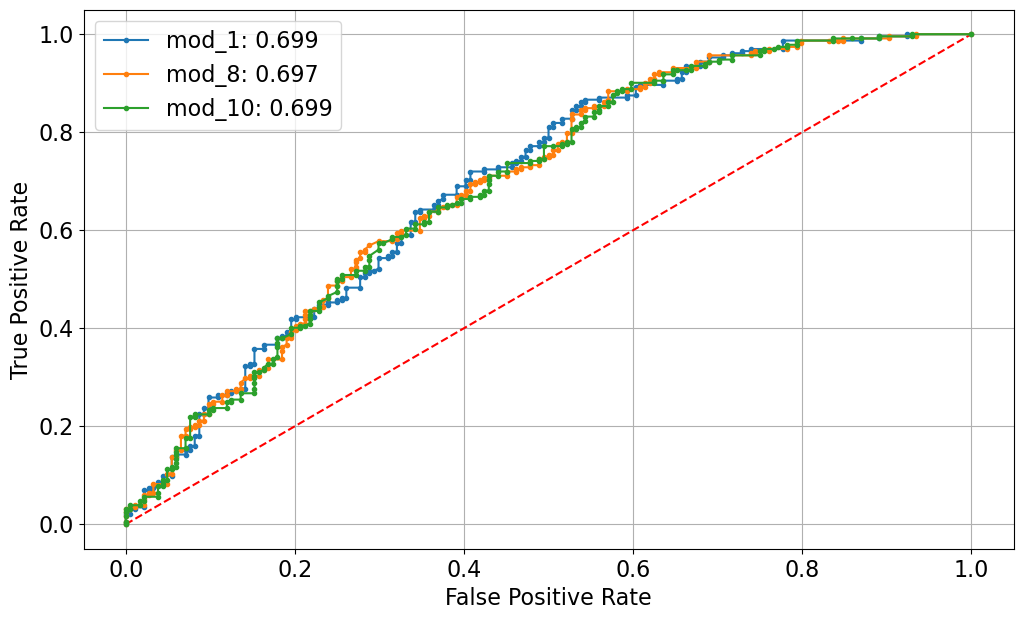

In [132]:
plt.figure(figsize=(12,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr1, tpr1, thresholds1 = roc_curve(Test['Contraceptive_method_used_Yes'], model_sk_1_pred_test_prob) # Model 1
auc = roc_auc_score(Test['Contraceptive_method_used_Yes'], model_sk_1_pred_test_prob) # getting AUC for the model
plt.plot(fpr1, tpr1, marker='.', label = 'mod_1: %.3f'% auc)

fpr8, tpr8, thresholds8 = roc_curve(Test['Contraceptive_method_used_Yes'], model_sk_8_pred_test_prob) # Model 8
auc = roc_auc_score(Test['Contraceptive_method_used_Yes'], model_sk_8_pred_test_prob) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr8, tpr8, marker='.', label = 'mod_8: %.3f'% auc)

fpr10, tpr10, thresholds10 = roc_curve(Test['Contraceptive_method_used_Yes'], model_sk_10_pred_test_prob) # Model 10
auc = roc_auc_score(Test['Contraceptive_method_used_Yes'], model_sk_1_pred_test_prob) # getting AUC for the model
plt.plot(fpr10, tpr10, marker='.', label = 'mod_10: %.3f'% auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [133]:
pd.options.display.max_rows = None

In [134]:
pd.DataFrame({'threshold':thresholds8, 'tpr': tpr8, 'fpr': fpr8})

,threshold,tpr,fpr
0,1.938611,0.000000,0.000000
1,0.938611,0.004310,0.000000
2,0.916348,0.017241,0.000000
3,0.911419,0.025862,0.000000
4,0.904276,0.030172,0.000000
5,0.898284,0.030172,0.005435
6,0.892348,0.034483,0.005435
7,0.891500,0.034483,0.010870
8,0.881330,0.038793,0.010870
9,0.879393,0.038793,0.021739


#### Predictive Approach for Logistic Regression findings: 
    - We are doing Logistic Regression for Model_1, Model_8 and Model_10.
    - In this approach Model_10 is having good accuracy in train and test model.
    - In Logistic Regression, We are getting good AUC Score for Model 10 is 0.697.
    - The Threshold for deciding the class is 0.47

## Linear Discriminant Analysis

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Model_1 : Features of Descriptive Model_1

In [136]:
clf = LinearDiscriminantAnalysis()
lda_model1=clf.fit(X1_train,y1_train)

In [137]:
y1train_predict1 = lda_model1.predict(X1_train)
y1test_predict1 = lda_model1.predict(X1_test)

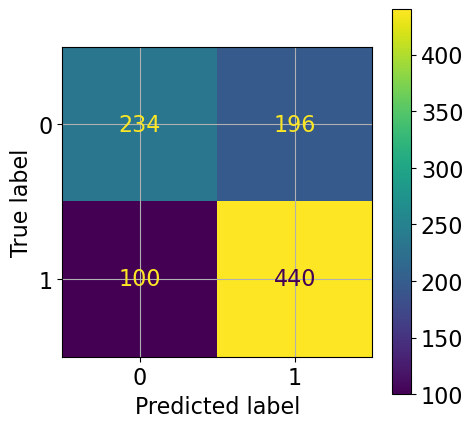

In [138]:
plot_confusion_matrix(lda_model1,X1_train,y1_train)

In [139]:
print(classification_report(y1_train, y1train_predict1))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       430
           1       0.69      0.81      0.75       540

    accuracy                           0.69       970
   macro avg       0.70      0.68      0.68       970
weighted avg       0.70      0.69      0.69       970



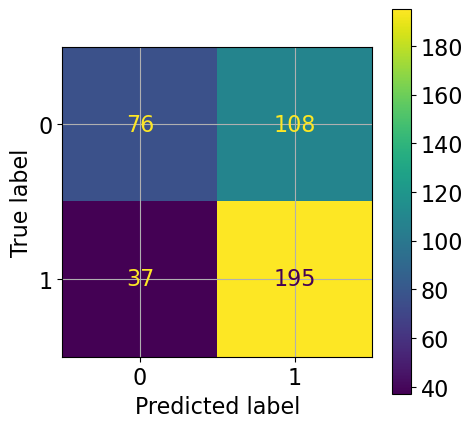

In [140]:
plot_confusion_matrix(lda_model1,X1_test,y1_test)

In [141]:
print(classification_report(y1_test, y1test_predict1))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51       184
           1       0.64      0.84      0.73       232

    accuracy                           0.65       416
   macro avg       0.66      0.63      0.62       416
weighted avg       0.66      0.65      0.63       416



In [142]:
resultsDf = resultsDf.append({'Classification Technique':'LDA 1',
                              'Train accuracy':lda_model1.score(X1_train,y1_train),
                              'Test accuracy':lda_model1.score(X1_test,y1_test)},ignore_index=True)

### Model_8 : Features from Descriptive Model_8.

In [143]:
clf = LinearDiscriminantAnalysis()
lda_model2=clf.fit(X2_train,y2_train)

In [144]:
lda_model2=clf.fit(X2_train,y2_train)

In [145]:
y2train_predict2 = lda_model2.predict(X2_train)
y2test_predict2 = lda_model2.predict(X2_test)

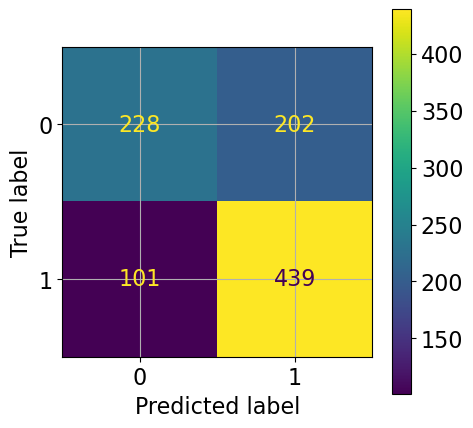

In [146]:
plot_confusion_matrix(lda_model2,X2_train,y2_train)

In [147]:
print(classification_report(y2_train, y2train_predict2))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       430
           1       0.68      0.81      0.74       540

    accuracy                           0.69       970
   macro avg       0.69      0.67      0.67       970
weighted avg       0.69      0.69      0.68       970



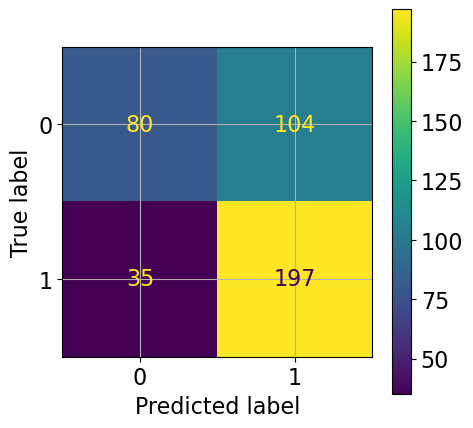

In [148]:
plot_confusion_matrix(lda_model2,X2_test,y2_test)

In [149]:
print(classification_report(y2_test, y2test_predict2))

              precision    recall  f1-score   support

           0       0.70      0.43      0.54       184
           1       0.65      0.85      0.74       232

    accuracy                           0.67       416
   macro avg       0.68      0.64      0.64       416
weighted avg       0.67      0.67      0.65       416



In [150]:
tn2, fp2, fn2, tp2 = confusion_matrix(y2_test, y2test_predict2).ravel()

In [151]:
tn2,fp2,fn2,tp2


(80, 104, 35, 197)

In [152]:
resultsDf = resultsDf.append({'Classification Technique':'LDA 8',
                              'Train accuracy':lda_model2.score(X2_train,y2_train),
                              'Test accuracy':lda_model2.score(X2_test,y2_test)},ignore_index=True)

### Model_9 : Features  of  Descriptive Model_9.

In [153]:
clf = LinearDiscriminantAnalysis()
lda_model3=clf.fit(X3_train,y3_train)

In [154]:
lda_model3=clf.fit(X3_train,y3_train)

In [155]:
y3train_predict3 = lda_model3.predict(X3_train)
y3test_predict3 = lda_model3.predict(X3_test)

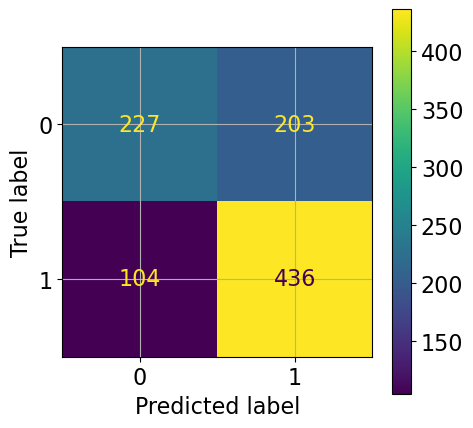

In [156]:
plot_confusion_matrix(lda_model3,X3_train,y3_train)

In [157]:
print(classification_report(y3_train, y3train_predict3))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       430
           1       0.68      0.81      0.74       540

    accuracy                           0.68       970
   macro avg       0.68      0.67      0.67       970
weighted avg       0.68      0.68      0.68       970



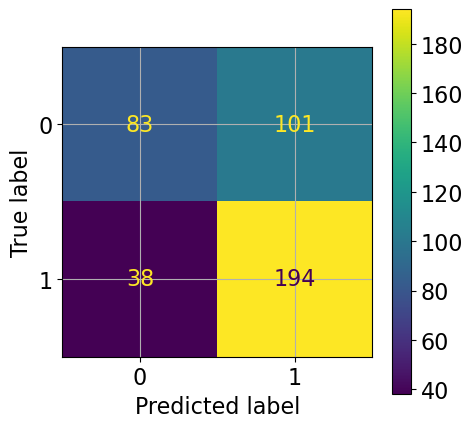

In [158]:
plot_confusion_matrix(lda_model3,X3_test,y3_test)

In [159]:
print(classification_report(y3_test, y3test_predict3))

              precision    recall  f1-score   support

           0       0.69      0.45      0.54       184
           1       0.66      0.84      0.74       232

    accuracy                           0.67       416
   macro avg       0.67      0.64      0.64       416
weighted avg       0.67      0.67      0.65       416



In [160]:
tn3, fp3, fn3, tp3 = confusion_matrix(y3_test, y3test_predict3).ravel()

In [161]:
tn3,fp3,fn3,tp3


(83, 101, 38, 194)

In [162]:
resultsDf = resultsDf.append({'Classification Technique':'LDA 9',
                              'Train accuracy':lda_model3.score(X3_train,y3_train),
                              'Test accuracy':lda_model3.score(X3_test,y3_test)},ignore_index=True)

### Model_4 : Descriptive model_10 features which have P values less than 0.05

In [163]:
lda_model4=clf.fit(X4_train,y4_train)

In [164]:
y4train_predict4 = lda_model4.predict(X4_train)
y4test_predict4 = lda_model4.predict(X4_test)

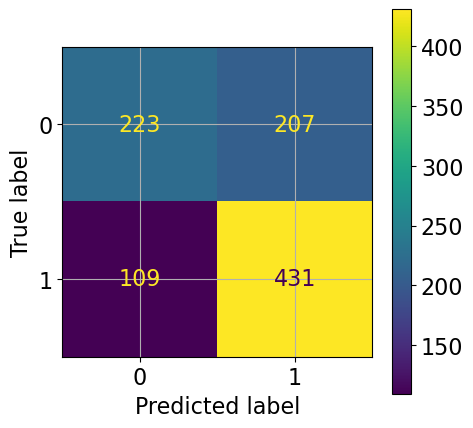

In [165]:
plot_confusion_matrix(lda_model4,X4_train,y4_train)

In [166]:
print(classification_report(y4_train, y4train_predict4))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59       430
           1       0.68      0.80      0.73       540

    accuracy                           0.67       970
   macro avg       0.67      0.66      0.66       970
weighted avg       0.67      0.67      0.67       970



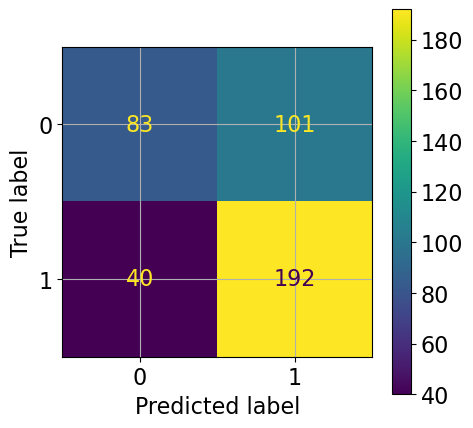

In [167]:
plot_confusion_matrix(lda_model4,X4_test,y4_test)

In [168]:
print(classification_report(y4_test, y4test_predict4))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54       184
           1       0.66      0.83      0.73       232

    accuracy                           0.66       416
   macro avg       0.67      0.64      0.64       416
weighted avg       0.66      0.66      0.65       416



In [169]:
tn4, fp4, fn4, tp4 = confusion_matrix(y4_test, y4test_predict4).ravel()

In [170]:
tn4,fp4,fn4,tp4


(83, 101, 40, 192)

In [171]:
resultsDf = resultsDf.append({'Classification Technique':'LDA 10',
                              'Train accuracy':lda_model4.score(X4_train,y4_train),
                              'Test accuracy':lda_model4.score(X4_test,y4_test)},ignore_index=True)

In [193]:
resultsDf[4:8]

,Classification Technique,Train accuracy,Test accuracy
4,LDA 1,0.694845,0.651442
5,LDA 8,0.687629,0.665865
6,LDA 9,0.683505,0.665865
7,LDA 10,0.674227,0.661058


In [173]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(Train[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                     'Wife_education_Tertiary','Wife_religion_Scientology',
                     'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']],Train['Contraceptive_method_used_Yes'])
model_lda

LinearDiscriminantAnalysis()

In [174]:
pred_lda = model_lda.predict(Test[['Wife_age', 'No_of_children_born', 'Wife_education_Secondary',
                                   'Wife_education_Tertiary','Wife_religion_Scientology',
                                   'Standard_of_living_index_VeryHigh', 'Standard_of_living_index_VeryLow','Media_exposure_Not_Exposed']])
pred_lda

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [175]:
print(classification_report(Test['Contraceptive_method_used_Yes'], pred_lda))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       184
           1       0.65      0.78      0.71       232

    accuracy                           0.65       416
   macro avg       0.64      0.63      0.63       416
weighted avg       0.64      0.65      0.64       416



## Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [177]:
from sklearn.metrics import accuracy_score

### Model_1 :  Features Descriptive model_1 

In [178]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,y1, test_size = 0.3, random_state=2, stratify = data_mod['Contraceptive_method_used_Yes']) 
dt1=DecisionTreeClassifier(max_depth=4, random_state=12)
dt1.fit(X1_train, Y1_train)

train_pred1 = dt1.predict(X1_train)
test_pred1 = dt1.predict(X1_test)

print('Train Score: ', accuracy_score(Y1_train, train_pred1))
print('Test Score: ', accuracy_score(Y1_test, test_pred1))

Train Score:  0.722680412371134
Test Score:  0.6778846153846154


In [179]:
resultsDf = resultsDf.append({'Classification Technique':'DT 1',
                              'Train accuracy':accuracy_score(Y1_train, train_pred1),
                              'Test accuracy':accuracy_score(Y1_test, test_pred1)},ignore_index=True)

### Model_8 :  Features of Descriptive Model_8.

In [180]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,y2, test_size = 0.3, random_state=2, stratify = data_mod['Contraceptive_method_used_Yes']) 
dt2=DecisionTreeClassifier(max_depth=4, random_state=12)
dt2.fit(X2_train, Y2_train)

train_pred2 = dt2.predict(X2_train)
test_pred2 = dt2.predict(X2_test)

print('Train Score: ', accuracy_score(Y2_train, train_pred2))
print('Test Score: ', accuracy_score(Y2_test, test_pred2))

Train Score:  0.7216494845360825
Test Score:  0.6778846153846154


In [181]:
resultsDf = resultsDf.append({'Classification Technique':'DT 8',
                              'Train accuracy':accuracy_score(Y2_train, train_pred2),
                              'Test accuracy':accuracy_score(Y2_test, test_pred2)},ignore_index=True)

### Model_9 : Features of Descriptive model_9.

In [182]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,y3, test_size = 0.3, random_state=2, stratify = data_mod['Contraceptive_method_used_Yes']) 
dt3=DecisionTreeClassifier(max_depth=4, random_state=12)
dt3.fit(X3_train, Y3_train)

train_pred3 = dt3.predict(X3_train)
test_pred3 = dt3.predict(X3_test)

print('Train Score: ', accuracy_score(Y3_train, train_pred3))
print('Test Score: ', accuracy_score(Y3_test, test_pred3))

Train Score:  0.7216494845360825
Test Score:  0.6778846153846154


In [183]:
resultsDf = resultsDf.append({'Classification Technique':'DT 9',
                              'Train accuracy':accuracy_score(Y3_train, train_pred3),
                              'Test accuracy':accuracy_score(Y3_test, test_pred3)},ignore_index=True)

### Model_10 : Features of Descriptive Model_10 -  Features with P values less than 0.05

In [184]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4,y4, test_size = 0.3, random_state=2, stratify = data_mod['Contraceptive_method_used_Yes']) 
dt4=DecisionTreeClassifier(max_depth=4, random_state=12)
dt4.fit(X4_train, Y4_train)

train_pred4 = dt4.predict(X4_train)
test_pred4 = dt4.predict(X4_test)

print('Train Score: ', accuracy_score(Y4_train, train_pred4))
print('Test Score: ', accuracy_score(Y4_test, test_pred4))

Train Score:  0.7216494845360825
Test Score:  0.6778846153846154


In [185]:
resultsDf = resultsDf.append({'Classification Technique':'DT 10',
                              'Train accuracy':accuracy_score(Y4_train, train_pred4),
                              'Test accuracy':accuracy_score(Y4_test, test_pred4)},ignore_index=True)

In [186]:
accuracy_score(Y4_train, train_pred4)

0.7216494845360825

In [187]:
resultsDf

,Classification Technique,Train accuracy,Test accuracy
0,Logistic Regression 1,0.690722,0.651442
1,Logistic Regression 8,0.685567,0.661058
2,Logistic Regression 9,0.678351,0.665865
3,Logistic Regression 10,0.675258,0.661058
4,LDA 1,0.694845,0.651442
5,LDA 8,0.687629,0.665865
6,LDA 9,0.683505,0.665865
7,LDA 10,0.674227,0.661058
8,DT 1,0.722680,0.677885
9,DT 8,0.721649,0.677885


### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [188]:
model_eval # Logistic Regression Descriptive Approach Models

,model_name,model_perf
1,Model_1,0.105719
2,Model_2,0.106759
3,Model_3,0.107735
4,Model_4,0.108549
5,model_5,0.109168
6,model_6,0.109653
7,model_7,0.110085
8,model_8,0.110326
9,model_9,0.110277
10,model_10,0.109893


In [189]:
resultsDf

,Classification Technique,Train accuracy,Test accuracy
0,Logistic Regression 1,0.690722,0.651442
1,Logistic Regression 8,0.685567,0.661058
2,Logistic Regression 9,0.678351,0.665865
3,Logistic Regression 10,0.675258,0.661058
4,LDA 1,0.694845,0.651442
5,LDA 8,0.687629,0.665865
6,LDA 9,0.683505,0.665865
7,LDA 10,0.674227,0.661058
8,DT 1,0.722680,0.677885
9,DT 8,0.721649,0.677885


## Insights 

#### 1. Logistic Regression


#### Model 1:
    - Model 1 with all the fetaures in 3 different algorithm is performing better, but it contains non significant features which are having p_value higher than 0.05.
#### Model 8:
    - Model 8 is having some fewer features with statistically significant, but with 2 non significant features.
    - Performance wise in Logistic Regression, Model_8 is having higher accuracy.
#### Model 9:
    - The accuracy for model_9 is dropping slightly, but with only 1 non significant feature.
#### Model 10:
    - Model_10 is having all the features which are statistically significant with p value lesser than 0.05.

#### Linear Discriminant Analysis:

- LDA models are performing similar to logistic regression models

#### Decison Tree : 
- In Decison tree also Model 10 is performing better when compared to other decision tree models

## Recommendations : 

- Decision Tree is performing well in train and test model when compared to logistic regression and Linear Discriminant Analysis.